In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Download prosperLoanData.csv
loan_file = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
file_name = loan_file.split('/')[-1]
response = requests.get(loan_file)

with open(file_name, mode = 'wb') as file:
    file.write(response.content)

In [3]:
#verify - remove in final submission
file_name

'prosperLoanData.csv'

In [4]:
#load data set
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# Assessment Process

In [5]:
# descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [8]:
#Filter out Cancelled Loan Status entries
cancelled = df['LoanStatus'] == 'Cancelled'
df.loc[cancelled,['Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'LoanOriginationQuarter','BorrowerAPR', 'StatedMonthlyIncome']]

,Occupation,EmploymentStatus,LoanOriginalAmount,LoanOriginationQuarter,BorrowerAPR,StatedMonthlyIncome
332,NaN,NaN,1000,Q2 2006,0.25650,0.000000
59998,Administrative Assistant,Not available,2500,Q2 2006,0.14659,4166.666667
72480,NaN,NaN,3000,Q1 2006,0.20735,3833.333333
97281,NaN,NaN,1000,Q2 2006,0.25650,2600.000000
112975,Other,Full-time,1000,Q4 2008,0.16219,2444.666667


In [9]:
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [10]:
#Filter null Employment Status values
emp_stat_nan = df['EmploymentStatus'].isnull()
print(sum(emp_stat_nan))
df.loc[emp_stat_nan, ['StatedMonthlyIncome', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus']]

2255


,StatedMonthlyIncome,LoanOriginalAmount,IncomeRange,LoanStatus,Occupation,EmploymentStatus
39,9583.333333,10000,Not displayed,Completed,NaN,NaN
92,10833.333333,2300,Not displayed,Completed,NaN,NaN
146,0.083333,4000,Not displayed,Completed,NaN,NaN
162,7500.000000,3000,Not displayed,Completed,NaN,NaN
193,2500.000000,2000,Not displayed,Defaulted,NaN,NaN
206,9166.666667,7500,Not displayed,Defaulted,NaN,NaN
247,2666.666667,1000,Not displayed,Completed,NaN,NaN
250,6416.666667,2000,Not displayed,Completed,NaN,NaN
310,3750.000000,1800,Not displayed,Completed,NaN,NaN
325,5416.666667,6500,Not displayed,Completed,NaN,NaN


In [11]:
#Filter Part-time and Full-time employees
employed = (df['EmploymentStatus'] == 'Full-time') | (df['EmploymentStatus'] == 'Part-time')
print(sum(employed))
df.loc[employed, ['StatedMonthlyIncome', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus']]

27443


,StatedMonthlyIncome,LoanOriginalAmount,IncomeRange,LoanStatus,Occupation,EmploymentStatus
11,1666.666667,1000,"$1-24,999",Completed,Waiter/Waitress,Full-time
16,8291.666667,4000,"$75,000-99,999",Current,Professional,Full-time
21,3750.000000,3000,"$25,000-49,999",Completed,Professional,Full-time
27,6666.666667,4000,"$75,000-99,999",Completed,Executive,Full-time
46,3166.666667,4000,"$25,000-49,999",Completed,Accountant/CPA,Full-time
59,2750.000000,7000,"$25,000-49,999",Completed,Other,Full-time
62,3891.666667,23500,"$50,000-74,999",Chargedoff,Other,Full-time
68,2750.000000,1000,"$25,000-49,999",Completed,Nurse's Aide,Full-time
77,6466.666667,5600,"$75,000-99,999",Completed,Analyst,Full-time
78,0.000000,4800,$0,Chargedoff,Realtor,Full-time


In [12]:
#Filter Not employed
not_employed = (df['EmploymentStatus'] == 'Not employed')
print(sum(not_employed))
df.loc[not_employed, ['StatedMonthlyIncome', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus']]

835


,StatedMonthlyIncome,LoanOriginalAmount,IncomeRange,LoanStatus,Occupation,EmploymentStatus
66,860.000000,1000,Not employed,Completed,Other,Not employed
100,0.000000,4000,Not employed,Chargedoff,Other,Not employed
125,0.000000,5000,Not employed,Current,Other,Not employed
170,0.000000,10000,Not employed,Completed,Other,Not employed
186,0.000000,4000,Not employed,Chargedoff,Other,Not employed
335,0.000000,2000,Not employed,Completed,Other,Not employed
688,0.000000,2500,Not employed,Completed,Other,Not employed
973,0.000000,2000,Not employed,Completed,Other,Not employed
988,0.000000,1000,Not employed,Completed,Other,Not employed
1014,0.000000,15000,Not employed,Current,Other,Not employed


In [13]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [14]:
#Inspect $0 entries in Income Range column
zeros_income_r = df['IncomeRange'] == '$0'
print('sum:', sum(zeros_income_r))
df.loc[zeros_income_r, ['StatedMonthlyIncome', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus']]

sum: 621


,StatedMonthlyIncome,LoanOriginalAmount,IncomeRange,LoanStatus,Occupation,EmploymentStatus
78,0.0,4800,$0,Chargedoff,Realtor,Full-time
108,0.0,14000,$0,Completed,Executive,Full-time
772,0.0,3500,$0,Completed,Other,Full-time
954,0.0,7500,$0,Completed,Principal,Full-time
1346,0.0,1000,$0,Completed,Sales - Retail,Self-employed
1478,0.0,25000,$0,Chargedoff,Professional,Self-employed
1790,0.0,1000,$0,Chargedoff,Other,Self-employed
1822,0.0,1250,$0,Completed,Retail Management,Full-time
1926,0.0,4800,$0,Chargedoff,Construction,Full-time
2064,0.0,7000,$0,Completed,Construction,Full-time


In [15]:
#Inspect Not employed entries in Income Range column
noemp_income_r = df['IncomeRange'] == 'Not employed'
print('sum:', sum(noemp_income_r))
df.loc[noemp_income_r, ['StatedMonthlyIncome', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus']]

sum: 806


,StatedMonthlyIncome,LoanOriginalAmount,IncomeRange,LoanStatus,Occupation,EmploymentStatus
66,860.000000,1000,Not employed,Completed,Other,Not employed
100,0.000000,4000,Not employed,Chargedoff,Other,Not employed
125,0.000000,5000,Not employed,Current,Other,Not employed
170,0.000000,10000,Not employed,Completed,Other,Not employed
186,0.000000,4000,Not employed,Chargedoff,Other,Not employed
335,0.000000,2000,Not employed,Completed,Other,Not employed
688,0.000000,2500,Not employed,Completed,Other,Not employed
973,0.000000,2000,Not employed,Completed,Other,Not employed
988,0.000000,1000,Not employed,Completed,Other,Not employed
1014,0.000000,15000,Not employed,Current,Other,Not employed


In [16]:
df.LoanOriginationQuarter.unique()

array(['Q3 2007', 'Q1 2014', 'Q1 2007', 'Q4 2012', 'Q3 2013', 'Q4 2013',
       'Q2 2013', 'Q2 2012', 'Q4 2007', 'Q3 2006', 'Q1 2013', 'Q2 2010',
       'Q1 2012', 'Q3 2012', 'Q4 2010', 'Q4 2011', 'Q3 2008', 'Q2 2007',
       'Q4 2006', 'Q2 2011', 'Q1 2011', 'Q1 2008', 'Q3 2009', 'Q3 2011',
       'Q2 2008', 'Q1 2010', 'Q4 2009', 'Q2 2006', 'Q3 2010', 'Q1 2006',
       'Q4 2008', 'Q4 2005', 'Q2 2009'], dtype=object)

In [17]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [18]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [19]:
print('StatedMonthlyIncome.max():', df.StatedMonthlyIncome.max())
df.StatedMonthlyIncome.describe()

StatedMonthlyIncome.max(): 1750002.916667


count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [20]:
#Inspect  entries in StatedMonthlyIncome with values over 100,000
high_income = df['StatedMonthlyIncome'] >= 100000
print('sum:', sum(high_income))
df.loc[high_income, ['StatedMonthlyIncome', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus']]


sum: 18


,StatedMonthlyIncome,LoanOriginalAmount,IncomeRange,LoanStatus,Occupation,EmploymentStatus
8066,4.166667e+05,2000,"$100,000+",Completed,Police Officer/Correction Officer,Employed
8870,2.083333e+05,12500,Not displayed,Chargedoff,Other,Not available
17411,4.833333e+05,7500,"$100,000+",Completed,Professional,Employed
35218,1.083333e+05,1000,"$100,000+",Completed,Attorney,Full-time
45028,1.500000e+05,4000,"$100,000+",Current,Nurse (RN),Self-employed
48469,1.000000e+05,6000,"$100,000+",Completed,Nurse (RN),Self-employed
53014,6.185478e+05,4000,"$100,000+",Completed,Other,Self-employed
53167,1.750003e+06,4000,"$100,000+",Current,Professional,Self-employed
56867,1.850818e+05,25000,"$100,000+",Completed,Other,Self-employed
57133,4.666667e+05,4000,"$100,000+",Current,Other,Employed


In [21]:
#Inspect Debt To Income Ration

print('max value of Debt to Income Ratio is:', df.DebtToIncomeRatio.max())
high_inc_ratio = (df['DebtToIncomeRatio'] >= 9.5 )
print(high_inc_ratio.sum())
df.loc[high_inc_ratio, ['DebtToIncomeRatio','StatedMonthlyIncome', 'LoanOriginalAmount', 'IncomeRange', 'LoanStatus', 'Occupation', 'EmploymentStatus']]

max value of Debt to Income Ratio is: 10.01
273


,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,IncomeRange,LoanStatus,Occupation,EmploymentStatus
226,10.01,0.083333,1000,Not displayed,Completed,Other,Full-time
576,10.01,0.083333,1500,"$1-24,999",Completed,Homemaker,Retired
626,10.01,3.833333,2000,"$1-24,999",Current,Other,Employed
1242,10.01,0.083333,3000,Not employed,Completed,Student - College Graduate Student,Not employed
1925,10.01,0.083333,3000,Not employed,Defaulted,Other,Not employed
2155,10.01,17083.333333,13500,"$100,000+",Completed,Sales - Commission,Full-time
2217,10.01,0.083333,7000,Not displayed,Completed,Teacher,Not available
2394,10.01,0.083333,4000,Not employed,Defaulted,Other,Not employed
2715,10.01,0.083333,7500,Not displayed,Completed,Other,Not available
3494,10.01,0.083333,4500,Not employed,Chargedoff,Sales - Commission,Not employed


In [22]:
#Filter out Final Payment Loan Status entries
final_payment = df['LoanStatus'] == 'FinalPaymentInProgress'
df.loc[cancelled,['Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'LoanOriginationQuarter','BorrowerAPR', 'StatedMonthlyIncome']]

,Occupation,EmploymentStatus,LoanOriginalAmount,LoanOriginationQuarter,BorrowerAPR,StatedMonthlyIncome
332,NaN,NaN,1000,Q2 2006,0.25650,0.000000
59998,Administrative Assistant,Not available,2500,Q2 2006,0.14659,4166.666667
72480,NaN,NaN,3000,Q1 2006,0.20735,3833.333333
97281,NaN,NaN,1000,Q2 2006,0.25650,2600.000000
112975,Other,Full-time,1000,Q4 2008,0.16219,2444.666667


## Quality
- Simplify data by renaming all entries in `LoanStatus` with substring 'Past Due' to 'Past Due'
- Convert all NaN values in Employment Status variable to string 'Not available
- Values in Credit Grade (pree 2009) to be converted to Propser Rating Numeric (Alpha)
- ListingCreationDate, ClosedDate & LoanOriginationDate are object datatypes instead of a datetime datatypes
- Simply Data by Renaming all Full-time and 'Part-time' values in `EmploymentStatus` variable to string 'Employed'
- Empty fields in `ProsperRating (Alpha)` to be replaced with the value 'NC'
- Remove high `StatedMonthlyIncome` entries that are unrealistic
- Remove high `DebtToIncomeRatio` entries over 9 that are considered too high
- Remove `LoanStatus` entries with 'Cancelled' to simplify dataset
- Remove `EmploymentStatus` entries with 'Not employed' to simplify dataset
- Remove `LoanStatus` entries with 'FinalPaymentInProgress' to simplify dataset
- Convert IncomeRange, LoanOriginationQuarter and PropserRating (Alpha) into ordered categories


## Tidiness
No tidiness issues to address during the cleaning process of the data

# Cleaning Process

In [23]:
df_clean = df.copy()

#### Quality #1. Simplify data by renaming all entries in `LoanStatus` with substring 'Past Due' to 'Past Due'


In [24]:
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [25]:
#Replace values that match 'Past Due' as a substring with 'Past Due'
df_clean.loc[df_clean['LoanStatus'].str.contains('Past'), 'LoanStatus'] = 'Past Due'

In [26]:
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

#### Quality #2: Convert all NaN values in Employment Status variable to string 'Not available'

In [27]:
df_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [28]:
#Replace values that match NaN with string 'Not avaiable'
df_clean.loc[df_clean['EmploymentStatus'].isnull(), 'EmploymentStatus'] = 'Not available'

In [29]:
#verify updates
df_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

#### Quality #3: Values in `Credit Grade` (pre 2009) to be copied into empty fields in` Prosper Rating (Alpha)`

In [30]:
#verify number of ProsperRating (Alpha) entries
len(df_clean['ProsperRating (Alpha)'])

113937

In [31]:
df_clean[['CreditGrade', 'ProsperRating (Alpha)']].head()

,CreditGrade,ProsperRating (Alpha)
0,C,NaN
1,NaN,A
2,HR,NaN
3,NaN,A
4,NaN,D


In [32]:
#For each row, copy values in CreditGrade column (pre 2009) into the null spaces in 'ProsperRating (Alpha)'
df_clean.loc[df_clean['ProsperRating (Alpha)'].isnull(), 'ProsperRating (Alpha)'] = df_clean.CreditGrade

In [33]:
df_clean[['CreditGrade', 'ProsperRating (Alpha)']].head()

,CreditGrade,ProsperRating (Alpha)
0,C,C
1,NaN,A
2,HR,HR
3,NaN,A
4,NaN,D


In [34]:
#verify number of PropserRating (Alpha) entries
len(df_clean['ProsperRating (Alpha)'])

113937

#### Quality #4: `ListingCreationDate`, `ClosedDate` , `DateCreditPulled` &`LoanOriginationDate` are object datatypes instead of a datetime datatypes

In [35]:
#convert to datetime data types
df_clean.ListingCreationDate = pd.to_datetime(df_clean.ListingCreationDate)
df_clean.ClosedDate = pd.to_datetime(df_clean.ClosedDate)
df_clean.DateCreditPulled = pd.to_datetime(df_clean.DateCreditPulled)
df_clean.LoanOriginationDate = pd.to_datetime(df_clean.LoanOriginationDate)

In [36]:
#verify - Delete in final submission
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
Prospe

#### Quality #5: Simply Data by Renaming all Full-time and 'Part-time'  values in `Employment Status` variable to string 'Employed'

In [37]:
#verify
df_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [38]:
#Replace values that match NaN with string 'Not avaiable'
df_clean.loc[employed, 'EmploymentStatus'] = 'Employed'

In [39]:
#verify
df_clean.EmploymentStatus.value_counts()

Employed         94765
Not available     7602
Self-employed     6134
Other             3806
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

#### Quality #6: Empty fields in `ProsperRating (Alpha)` to be replaced with the value 'NC'

In [40]:
#For each row, copy values 'NC' into the null spaces in 'PropsperRating (Alpha)'
df_clean.loc[df_clean['ProsperRating (Alpha)'].isnull(), 'ProsperRating (Alpha)'] = 'NC'

In [41]:
#verify there are no null values in 'ProsperRating (Alpha)'
df_clean[df_clean['ProsperRating (Alpha)'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


#### Quality #7: Remove high `StatedMonthlyIncome` entries over USD10000 that are considered unrealistic

In [42]:
#Remove entries considered high income (over $100,000)
print('old:', df_clean.shape[0])
df_clean = df_clean.loc[-high_income,:]
print('new:', df_clean.shape[0])

old: 113937
new: 113919


#### Quality #8: Remove high `DebtToIncomeRatio` entries over 9 that are considered too high

In [43]:
#Remove entires with income-ratio greater than 9
print('old:', df_clean.shape[0])
df_clean = df_clean.loc[-high_inc_ratio,:]
print('new:', df_clean.shape[0])

old: 113919
new: 113646


#### Quality #9: Remove `LoanStatus` entries  with 'Cancelled' to simplify dataset

In [44]:
#verify
df_clean.LoanStatus.value_counts()

Current                   56546
Completed                 37941
Chargedoff                11909
Defaulted                  4975
Past Due                   2065
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [45]:
#Remove cancelled loan entries
print('old:', df_clean.shape[0])
df_clean = df_clean.loc[-cancelled,:]
print('new:', df_clean.shape[0])

old: 113646
new: 113641


In [46]:
#verify updates
df_clean.LoanStatus.value_counts()

Current                   56546
Completed                 37941
Chargedoff                11909
Defaulted                  4975
Past Due                   2065
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

#### Quality #10: Remove `EmploymentStatus` entries  with 'Not employed' to simplify dataset

In [47]:
#verify
df_clean.EmploymentStatus.value_counts()

Employed         94638
Not available     7552
Self-employed     6052
Other             3801
Not employed       808
Retired            790
Name: EmploymentStatus, dtype: int64

In [48]:
#Remove not employed status entries
print('old:', df_clean.shape[0])
df_clean = df_clean.loc[-not_employed,:]
print('new:', df_clean.shape[0])

old: 113641
new: 112833


In [49]:
#verify updates
df_clean.EmploymentStatus.value_counts()

Employed         94638
Not available     7552
Self-employed     6052
Other             3801
Retired            790
Name: EmploymentStatus, dtype: int64

#### Quality #11: Remove `LoanStatus` entries  with 'FinalPayementInProgress' to simplify dataset

In [50]:
#verify
df_clean.LoanStatus.value_counts()

Current                   56298
Completed                 37610
Chargedoff                11729
Defaulted                  4952
Past Due                   2039
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

In [51]:
#Remove final  payment loan entries
print('old:', df_clean.shape[0])
df_clean = df_clean.loc[-final_payment,:]
print('new:', df_clean.shape[0])

old: 112833
new: 112628


In [52]:
#verify updates
df_clean.LoanStatus.value_counts()

Current       56298
Completed     37610
Chargedoff    11729
Defaulted      4952
Past Due       2039
Name: LoanStatus, dtype: int64

#### Quality #12: Convert `IncomeRange`, `LoanStatus` , `EmploymentStatus` and `ProsperRating (Alpha)` into ordered categories

In [53]:
# convert IncomeRange, LoanOriginationQuarter, LoanStatus, ProsperRating (Alpha) and Employment Status into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999','$25,000-49,999', 
                                    '$50,000-74,999', '$75,000-99,999','$100,000+'], 
                    'LoanStatus': ['Chargedoff', 'Defaulted', 'Past Due',  'Current', 'Completed'],
                    'ProsperRating (Alpha)': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'EmploymentStatus':['Not available', 'Other', 'Retired','Self-employed','Employed']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [54]:
#verify updates
df_clean.LoanStatus.unique()

[Completed, Current, Past Due, Defaulted, Chargedoff]
Categories (5, object): [Chargedoff < Defaulted < Past Due < Current < Completed]

In [55]:
#verify updates
df_clean.IncomeRange.unique()

[$25,000-49,999, $50,000-74,999, Not displayed, $100,000+, $75,000-99,999, $1-24,999, $0]
Categories (7, object): [Not displayed < $0 < $1-24,999 < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < $100,000+]

In [56]:
#verify updates
df_clean.EmploymentStatus.unique()

[Self-employed, Employed, Not available, Other, Retired]
Categories (5, object): [Not available < Other < Retired < Self-employed < Employed]

In [57]:
#verify updates
df_clean['ProsperRating (Alpha)'].unique()

[C, A, HR, D, B, E, AA, NC]
Categories (8, object): [NC < HR < E < D < C < B < A < AA]

In [58]:
df_clean.reset_index(drop=True, inplace = True)

In [59]:
print(df_clean.shape)
df_clean.describe()

(112628, 81)


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.126280e+05,112628.000000,112603.000000,112628.000000,112628.000000,83940.000000,83940.000000,83940.000000,83940.000000,83940.000000,...,112628.000000,112628.000000,112628.000000,112628.000000,112628.000000,112628.000000,112628.000000,112628.000000,112628.000000,112628.000000
mean,6.294570e+05,40.860177,0.218386,0.192350,0.182290,0.168136,0.079964,0.095879,4.084108,5.956433,...,-54.733166,-14.190614,693.102422,674.053162,25.094824,0.998604,0.047493,0.023005,16.260393,80.551000
std,3.285967e+05,10.447191,0.080171,0.074661,0.074359,0.068234,0.046627,0.030353,1.668725,2.378447,...,60.707369,109.346242,2374.916333,2343.134447,276.090512,0.017808,0.330751,0.230375,292.479091,103.447269
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.018718e+05,36.000000,0.156290,0.133400,0.123500,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.190000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.019680e+05,36.000000,0.209310,0.183000,0.172500,0.159700,0.069900,0.091400,4.000000,6.000000,...,-34.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.971338e+05,36.000000,0.283390,0.250000,0.240000,0.223520,0.112000,0.115800,5.000000,8.000000,...,-13.890000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Structure of Data Set
There are 112,628 loan listings in the dataset with 81 variables for each entry. Majority of the vairables are numeric, however we have converted variables for `IncomeRange`, `LoanStatus`, `EmploymentStatus` and `ProsperRating (Alpha)` into ordered categories.

(worst) ——> (best) <br>
IncomeRange: Not displayed', 'Not employed', "\$$\0", '\$1-24,999','\$25,000-49,999', '\$50,000-74,999', '\$75,000-99,999','\$100,000+ <br>
LoanStatus: 'Chargedoff', 'Defaulted', 'Past Due',  'Current', 'FinalPaymentInProgress', 'Completed' <br>
ProsperRating (Alpha): 'NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA' <br>
EmploymentStatus: 'Not available', 'Other', 'Not employed', 'Retired','Self-employed','Employed'

We also addressed inconsistent data such as replacing NaN values with appropriate strings, as well as removing categories that are too few to make an impact on our analyses.

### Main Variables of Interest
For this project I shall explore the variables, factors or conditions that I suspect may best predict the ability of a borrower to succesfully pay off loans, and inversely, variables, factors or conditions that may best a borrowers tendency  to be overwhelmed by loans. Primariy variables I suspect will influence my analysis are the borrower's income, the interst rate on the loan, and the loan amount will have the strongest effects.

### Univariate Exploration
We start by looking at the main vairables of interest

#### 1. Stated Monthly Income

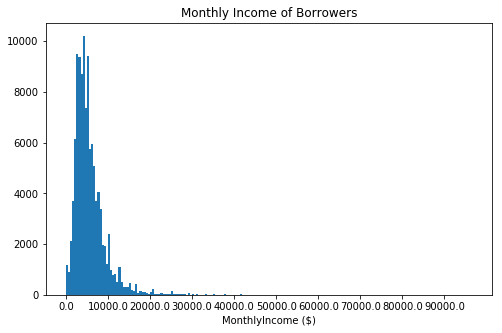

In [60]:
#Explore distrubution of Stated Monthly Income' on a standard scale (Quantitative Univariate)

binsize = 500
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+binsize, binsize)
binlabels = np.arange(0, df_clean['StatedMonthlyIncome'].max()+binsize, 10000)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xticks(binlabels,binlabels)
plt.xlabel('MonthlyIncome ($)')
plt.title('Monthly Income of Borrowers')
plt.show()

**Observation**: The plot is right skewed with a peak around USD5000. I will further investigate by looking closer into the plot by using a log scale

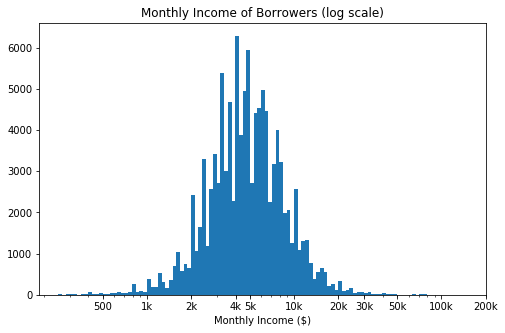

In [61]:
# Explore monthly income distribution, on a log scale, by creating a standard plot of the Stated Monthly Income (Quantitative Univariate)
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 4e3, 5e3, 1e4, 2e4, 3e4, 5e4, 1e5, 2e5], [500, '1k', '2k', '4k', '5k', '10k', '20k', '30k', '50k', '100k', '200k'])
plt.xlabel('Monthly Income ($)')
plt.title('Monthly Income of Borrowers (log scale)')
plt.show()

**Observation**: The plot shows a unimodal distribution with a majority of the borrowers reporting an monthly income of between USD4000 and USD5000

Next we explore first predictor variable, the Loan Amount
#### 2. Loan Amount

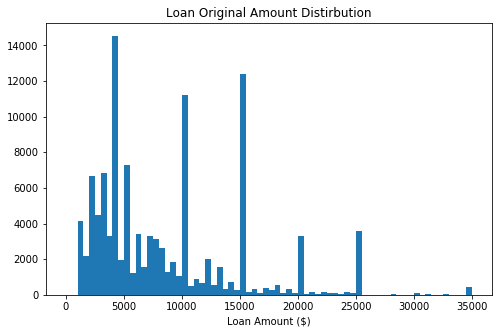

In [62]:
# Explore loan distribution by creating a standard plot of the Loan Original Amount (Quantitative Univariate)
binsize = 500
bins = np.arange(0, df_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.title('Loan Original Amount Distirbution')
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.show()

**Observation**: The plot appears to be right skewed,with several peaks at loan values around USD4000, USD10000, USD15000, USD20000 and USD25000. These are likely standard loan products.


To further explore we plot the distribution on a log scale

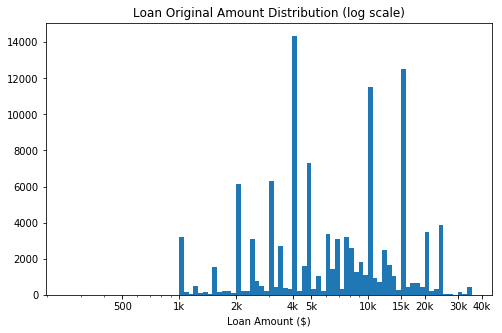

In [63]:
# Explore loan distribution, on a log scale, by creating a standard plot of the Loan Original Amount (Quantitative Univariate)
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.title('Loan Original Amount Distribution (log scale)')
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 4e3, 5e3, 1e4, 1.5e4, 2e4, 3e4, 4e4], [500, '1k', '2k', '4k', '5k', '10k', '15k', '20k', '30k', '40k'])
plt.xlabel('Loan Amount ($)')
plt.show()

**Observation**: The results of the distribution on a log scale displays a Original Loan Amount distribution highlights a greater number of peaks with the largest peak at USD4000. This corroborates our earlier hypothesis that they may represent popular loan products offered by the lender

Next, we exlplore another predictor variable, the monthly loan payment associated with each loan
#### 3. Monthly Loan Payment

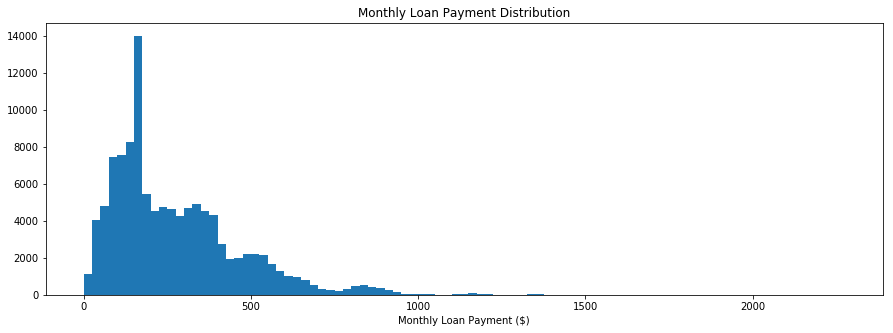

In [64]:
# Explore payment distribution by creating a standard plot of the Monthly Loan Payment (Quantitative Univariate)
binsize = 25
bins = np.arange(0, df_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.title('Monthly Loan Payment Distribution')
plt.hist(data = df_clean, x = 'MonthlyLoanPayment', bins = bins)
#plt.xticks(bins, bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.show()

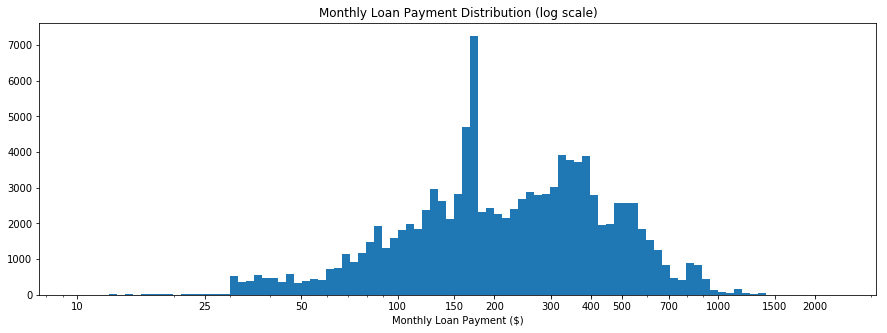

In [65]:
# Explore payment distribution by creating a log scale plot of the Monthly Loan Payment (Quantitative Univariate)
log_binsize = 0.025
bins = 10 ** np.arange(1.0, np.log10(df_clean['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = df_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.title('Monthly Loan Payment Distribution (log scale)')
plt.xscale('log')
plt.xticks([10, 25, 50, 100, 150, 200, 300, 4e2, 5e2, 7e2, 1e3, 1.5e3, 2e3], [10, 25, 50, 100, 150, 200, 300, 400, 500, 700, 1000, 1500, 2000])
plt.xlabel('Monthly Loan Payment ($)')
plt.show()

**Observation**: The results of the distribution on a log scale provides an more readable plot. Here, the Monthly Loan Payment distribution that is clearly seen to be bi-modal with a n abrupt peak at about USD175 and another between USD300-400.


Next, we exlplore another predictor variable, the revolving credit balance of the borrower at the start of the loan
#### 3. Revolving Credit Balance

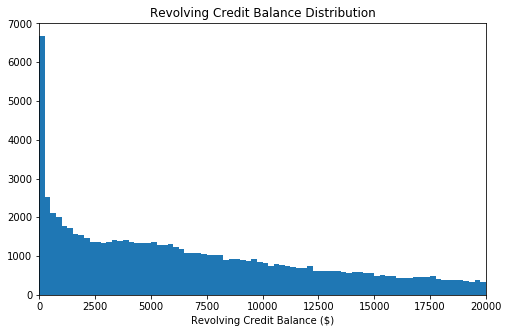

In [66]:
# Explore loan distribution by creating a standard plot of the Borrower's Revolving Credit Balance (Quantitative Univariate)

binsize = 250
bins = np.arange(0, df_clean['RevolvingCreditBalance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'RevolvingCreditBalance', bins = bins)
plt.title('Revolving Credit Balance Distribution')
plt.xlim([0, 20000])
plt.xlabel('Revolving Credit Balance ($)')
plt.show()

**Observation**: The result of the distribution is right skewed, with a majority of borrowers having a revolving credit balance of $0. This may be because many have not had revolving credit lines in the past, or the information is not on record. This plot may not be a good predictor because there may be other debt owed by the borrower that is not evident.

Another predictive variable is the Debt to Income ratio

#### 3. Debt To Income Ratio

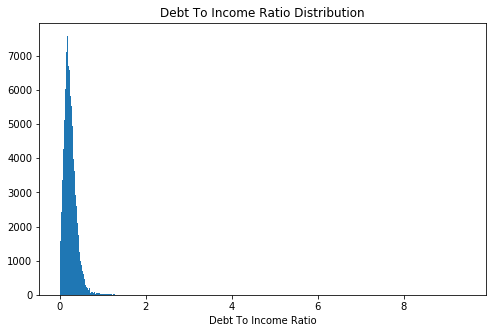

In [67]:
# Explore loan distribution by creating a standard plot of the Borrower's Debt to Income Ration (Quantitative Univariate)

binsize = 0.02
bins = np.arange(0, df_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Debt To Income Ratio Distribution')
plt.xlabel('Debt To Income Ratio')
plt.show()

**Observation**: The plot is skewed to the right, which indicates we may have some outliers that may be unacceptable to our analysis. This requires further investigation

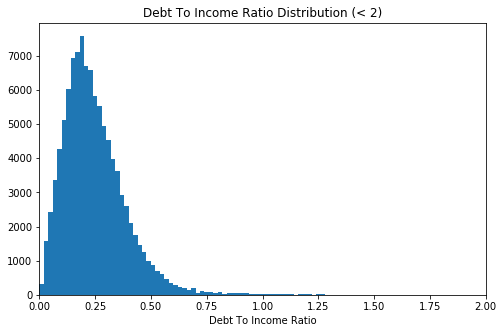

In [68]:
# Explore loan distribution by creating a standard plot of the Borrower's Debt to Income Ration (Quantitative Univariate)

binsize = 0.02
bins = np.arange(0, df_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Debt To Income Ratio Distribution (< 2)')
plt.xlim([0, 2])
plt.xlabel('Debt To Income Ratio')
plt.show()

We will perform further investigations in the `DebtToIncomeRatio` variable to assess it's usefullness in our analysis

In [69]:
# Further Investigating DebtToIncomeRatio outlier values
print('max value of Debt to Income Ratio is:', df_clean.DebtToIncomeRatio.max())
high_inc_ratio = (df_clean['DebtToIncomeRatio'] >= 5)
print(high_inc_ratio.sum())

max value of Debt to Income Ratio is: 9.44
60


In [70]:
#Observe outliers in dataset
df_clean.loc[high_inc_ratio,['Occupation', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LoanStatus', 'DebtToIncomeRatio']]

,Occupation,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LoanStatus,DebtToIncomeRatio
22,Other,"$1-24,999",118.333333,4000,172.76,Current,9.2000
2236,Other,"$1-24,999",216.666667,3500,152.42,Chargedoff,7.4200
5096,Teacher,"$1-24,999",150.000000,4000,172.60,Current,5.1800
5676,Student - College Senior,Not displayed,83.333333,2550,88.02,Completed,8.6300
5989,Other,"$1-24,999",209.000000,4000,172.76,Current,9.4400
7005,Other,Not displayed,158.333333,15000,628.59,Completed,6.0600
7784,Laborer,"$1-24,999",166.666667,13500,393.71,Current,6.6800
12608,Other,"$1-24,999",166.666667,2500,102.60,Chargedoff,5.2900
13068,Other,Not displayed,175.000000,1000,38.71,Defaulted,6.3700
15906,Other,"$25,000-49,999",3750.000000,1000,45.24,Chargedoff,7.9000


In [71]:
sum(df_clean.DebtToIncomeRatio.isnull())

7792

**Observation**: A good number of these outliers are in a negative state (Past Due, Defaulted or Chargedoff) which can be a clue to predicting loans that can default. Unfortunately a great number of this variable is null, so it won't be a factor worth considering during our analysis.

Another predictive variable is the Borrower APR

#### 4. Borrower APR

In [72]:
df_clean.BorrowerAPR.describe()

count    112603.000000
mean          0.218386
std           0.080171
min           0.006530
25%           0.156290
50%           0.209310
75%           0.283390
max           0.512290
Name: BorrowerAPR, dtype: float64

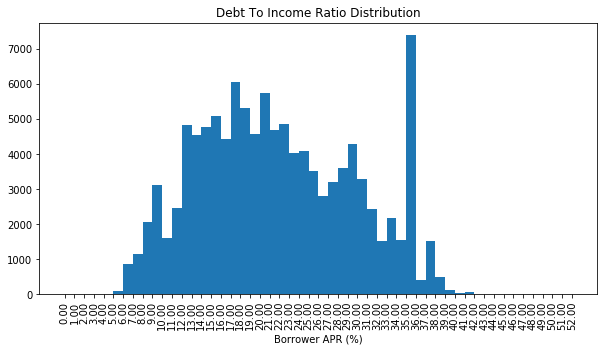

In [73]:
# Explore loan distribution by creating a standard plot of the Borrower's APR on loan (Quantitative Univariate)

binsize = 0.01
bins = np.arange(0, df_clean['BorrowerAPR'].max()+binsize, binsize)
bin_labels = bins * 100
bin_labels = ['{:0.2f}'.format(v) for v in bin_labels]

plt.figure(figsize=[10, 5])
plt.hist(data = df_clean, x = 'BorrowerAPR', bins = bins)
plt.title('Debt To Income Ratio Distribution')
plt.xticks(bins, bin_labels, rotation = 90)
plt.xlabel('Borrower APR (%)')
plt.show()

**Observation**: The data distribution is bimodal with a 18% and an abrupt spike at 36%


Now let's explore **qualitative univariate** variables.


First we explore the current Loan Status
#### 5. Loan Status

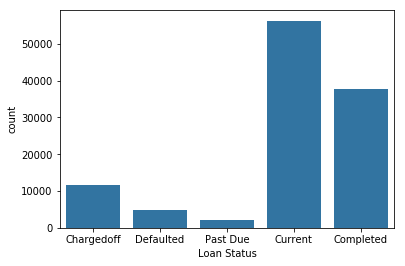

In [74]:
# Create bar chart of Loan Status information (Qualitative Univariate)
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'LoanStatus', color = base_color)
plt.xlabel('Loan Status')
plt.show()

**Observation**: From the bar plot we can see that a majority of loans are in the Currrent or Completed categories. Overall there are a smaller number of loans with a negative loan status (Past Due, Defaulted or Chargedoff). There are also a few items with very few entries. This may require further investigations

Now we explore another predictor variable which is the quarter of the year the loans are generated

#### 6. LoanOriginationQuarter

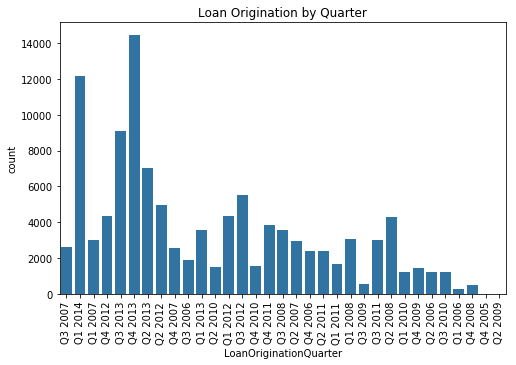

In [75]:
# Create bar chart of Loan Generation Quarter (Qualitative Univariate)
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df_clean, x = 'LoanOriginationQuarter', color = base_color)
plt.xticks(rotation = 90)
plt.title('Loan Origination by Quarter')
plt.show()

**Observation**: From the data, the distribution appears to be bimodal with a peak in Q2 2008 and steep increase, peaking in Q4 2014


Another potential predictor is the state in which the borrower resides
#### 7. Borrowers by State

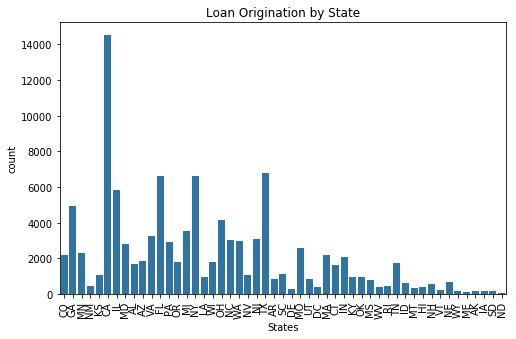

In [76]:
# Create bar chart of location (State) of the Borrower (Qualitative Univariate)
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df_clean, x = 'BorrowerState', color = base_color)
plt.xlabel('States')
plt.xticks(rotation = 90)
plt.title('Loan Origination by State')
plt.show()

**Observation**: Majority of the loans were offered to borrowers in the state of California. It would be interesting to further explore if other factors play a role here. This will be performed in the Bi-variate exploration section.


Another predictive factor is the Income Range of the Borrowers

#### 8. Income Range

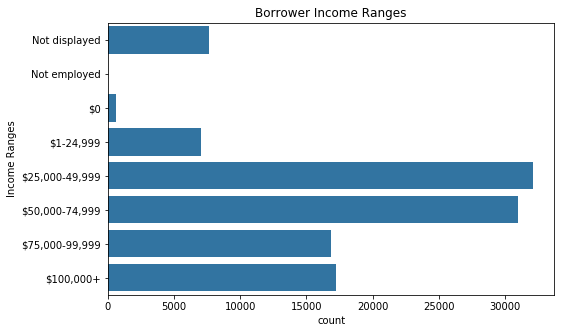

In [77]:
# Create bar chart of Borrower Income Range (Qualitative Univariate)
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df_clean, y = 'IncomeRange', color = base_color)
plt.ylabel('Income Ranges')
plt.title('Borrower Income Ranges')
plt.show()

**Observation**: Most loan recepients tend to be middle income earners with most in the USD25 - USD50K and the USD50k - USD75k annual income ranges. Some values are also identified as 'Not employed', 'Not displayed' and '$0', and may warrant further investigation

In [78]:
#Further exploration of $0 income entries
zero_income = df_clean[df_clean['IncomeRange'] == '$0']
#zero_income.Occupation.sample(20)
zero_income.loc[:,['Occupation','IncomeRange','StatedMonthlyIncome', 'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanStatus', 'LoanOriginalAmount', 'LoanOriginationDate']].sample(20)

,Occupation,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanStatus,LoanOriginalAmount,LoanOriginationDate
49486,Professional,$0,0.0,False,NaN,Chargedoff,1100,2008-05-27
4781,Teacher's Aide,$0,0.0,False,NaN,Completed,4000,2008-01-24
10568,Student - College Junior,$0,0.0,False,NaN,Completed,3000,2008-05-12
72893,Executive,$0,0.0,False,NaN,Completed,14400,2008-05-05
39609,Other,$0,0.0,False,NaN,Completed,3000,2007-08-01
761,Other,$0,0.0,False,NaN,Completed,3500,2008-04-15
94124,Realtor,$0,0.0,False,NaN,Defaulted,18500,2007-11-06
79923,Administrative Assistant,$0,0.0,False,NaN,Completed,6000,2008-06-24
104395,Analyst,$0,0.0,False,NaN,Completed,5500,2008-03-07
39305,Professional,$0,0.0,False,NaN,Completed,3000,2007-09-07


In [79]:
print('Number for borrower with $0 income:', zero_income.shape[0])
print('Number fo Veriviable Incomes:', zero_income.IncomeVerifiable.value_counts())
zero_income.LoanStatus.value_counts()      

Number for borrower with $0 income: 610
Number fo Veriviable Incomes: False    587
True      23
Name: IncomeVerifiable, dtype: int64


Completed     362
Chargedoff    183
Defaulted      50
Current        11
Past Due        4
Name: LoanStatus, dtype: int64

In [80]:
#Further exploration of 'Not displayed' income entries
not_displayed_income = df_clean[df_clean['IncomeRange'] == 'Not displayed']
print('# of Income Not Displayed Borrowers:', not_displayed_income.shape[0])
not_displayed_income.loc[:,['Occupation','IncomeRange','StatedMonthlyIncome', 'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanStatus', 'LoanOriginalAmount', 'LoanOriginationDate']].sample(20)

# of Income Not Displayed Borrowers: 7672


,Occupation,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanStatus,LoanOriginalAmount,LoanOriginationDate
37485,NaN,Not displayed,4416.666667,True,0.14918,Completed,10200,2006-04-24
72816,Other,Not displayed,3239.166667,True,0.23000,Chargedoff,8000,2007-01-25
6171,Laborer,Not displayed,1819.000000,True,0.08000,Defaulted,1603,2006-08-15
37357,NaN,Not displayed,4883.333333,True,0.17000,Completed,4300,2006-12-20
32953,Professional,Not displayed,3383.333333,True,0.15000,Defaulted,3700,2006-11-06
53973,Administrative Assistant,Not displayed,7000.000000,True,0.11000,Completed,5000,2006-11-21
16726,NaN,Not displayed,3812.250000,True,0.04000,Chargedoff,3001,2007-01-16
94018,Retail Management,Not displayed,1519.166667,True,0.67000,Completed,5329,2006-10-10
78760,Police Officer/Correction Officer,Not displayed,3000.000000,True,0.18000,Chargedoff,7500,2006-09-27
76949,NaN,Not displayed,1250.000000,True,NaN,Completed,1000,2006-06-09


In [81]:
#Further exploration of 'Not employed' income entries
not_employed_income = df_clean[df_clean['IncomeRange'] == 'Not employed']
print('# of Income Not Employed Borrowers:', not_employed_income.shape[0])
not_employed_income.loc[:,['Occupation','IncomeRange','StatedMonthlyIncome', 'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanStatus', 'LoanOriginalAmount', 'LoanOriginationDate']]

# of Income Not Employed Borrowers: 0


,Occupation,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanStatus,LoanOriginalAmount,LoanOriginationDate


**Observation**: Further investigating the categories above for `IncomeRange` do not reveal any abberations at the moment and will be considered as part of our analysis

Another predictive factor is the Prosper Rating (Alpha)
#### 8. Propser Rating (Alpha)

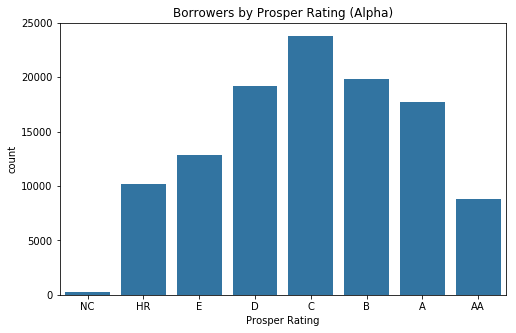

In [82]:
# Create bar chart of Propser Rating (Qualitative Univariate)
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df_clean, x = 'ProsperRating (Alpha)', color = base_color)
plt.xlabel('Prosper Rating')
plt.title('Borrowers by Prosper Rating (Alpha)')
plt.show()

**Observation**: The plot reveals a normal distribution with the peak at 'C' rating, which is considered an average weighted rating score.

#### 9. Employment Status

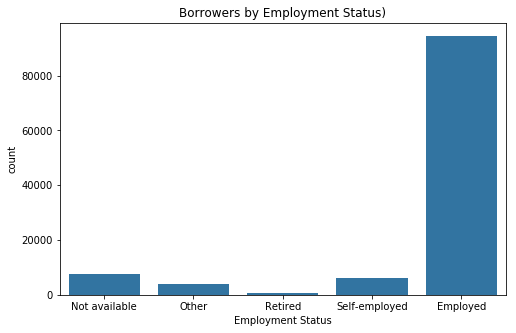

In [83]:
# Create bar chart of Employment Status (Qualitative Univariate)
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df_clean, x = 'EmploymentStatus', color = base_color)
plt.xlabel('Employment Status')
plt.title('Borrowers by Employment Status)')
plt.show()

**Observation**: The majority of borrowers are employed. This may be an interesting area to further explore if any factors specifically affect employed borrowers

### Key Take Aways
The `StateMonthlyIncome` and `OriginalLoanAmount` values had very large ranges, hence using a log transform for the plot was very useful. Under the transform, the Monthly Stated Income plot was uni-modal with peaks between USD4000 and USD5000. Under the transform, the Original Loan Amount plot had multiple peaks with the highest number of loans at about USD4000

Under Qualitative variable, the `LoanStatus` had a majority of the loans in the Current & Completed categories. From the `EmploymentStatus` plot, we also found an overwhelming number of loans assigned to borrowers with some form of employment. From the `PropserRating (Alpha)` plot, we find a normal distribution of borrower ratings with the peak at the 'C' Rating.

In [84]:
#reindex dataset
df_clean.reindex()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,-133.18,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,-24.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,-108.01,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,-60.27,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaT,0.15425,0.1314,0.1214,...,-25.33,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaT,0.31032,0.2712,0.2612,...,-22.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493,NaN,36,Current,NaT,0.23939,0.2019,0.1919,...,-69.21,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaT,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaT,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1


## Bivariate Exploration

To start off, I will further explore the Borrower State variable to see if it might be considered a variable of interest in my analysis.

C:\Users\Tomi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


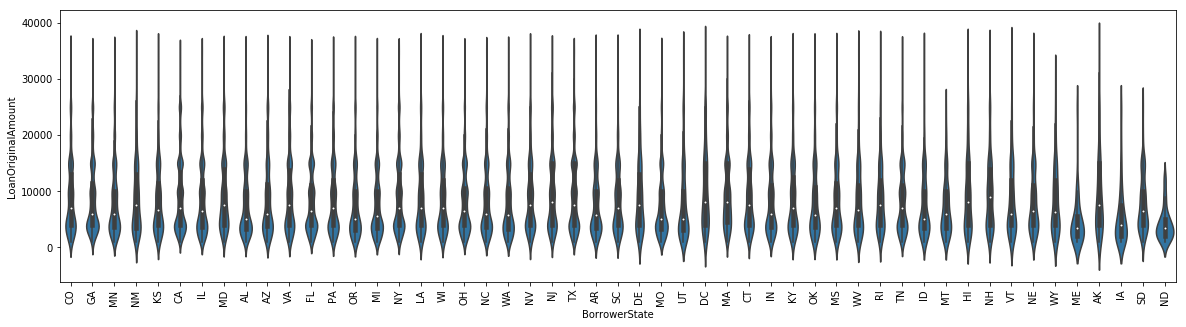

In [85]:
#State vs. Loan Amount via violin plot
plt.figure(figsize = [20, 5])
sb.violinplot(data = df_clean, x ='BorrowerState', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 90);


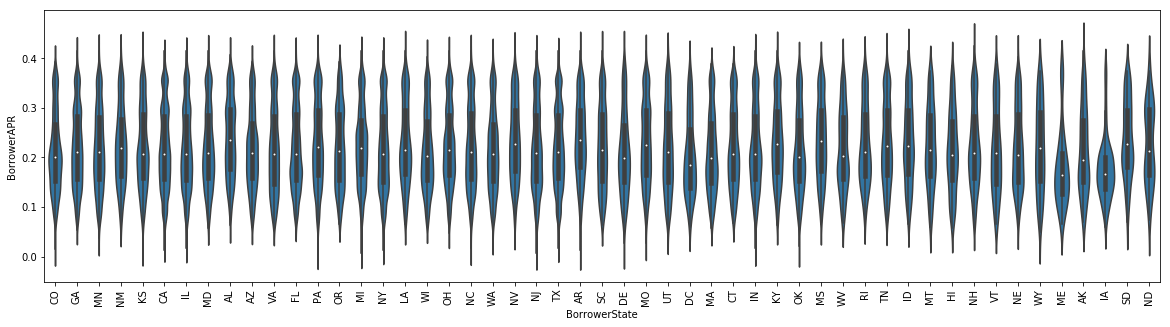

In [86]:
#State vs. BorrowerAPR via violin plot
plt.figure(figsize = [20, 5])
sb.violinplot(data = df_clean, x ='BorrowerState', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 90);


**Observation**: Further investigations did not show any interesting trends regarding the location of the borrower; hence this variable will not be considered a variable of interest.

Now, I will create arrays for the variables that I have selected would be of importance to the  analysis; then I would look at the pairwise correlations between the numeric variables in the data.

In [87]:
#Create arrays for variables of interest
numeric_vars = ['StatedMonthlyIncome', 'LoanOriginalAmount','BorrowerAPR', 'MonthlyLoanPayment']
categoric_vars = ['LoanStatus', 'LoanOriginationQuarter', 'EmploymentStatus', 'ProsperRating (Alpha)']

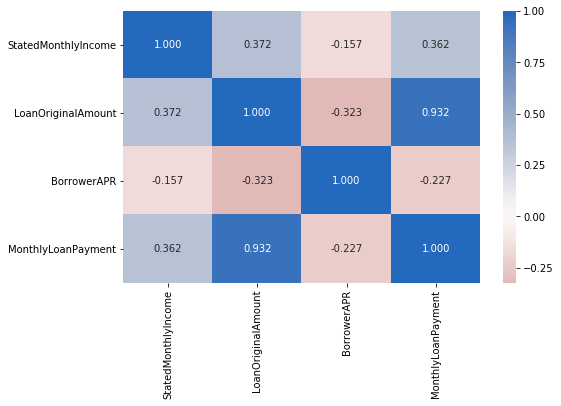

In [88]:
# correlation plot via heat map
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Observation**: As expected, there is a high correlation betoweeen the Loan Orignal Amount and the Monthy Loan Payment. There are less significant correlations between other variabes, with the most noticeable between (i) the Loan Original Amount and the Borrower APR, and (ii) StatedMonthlyIncome and the Loan Original Amount 

I will also generate scatter plots to further investigate any possible correlation

C:\Users\Tomi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Tomi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


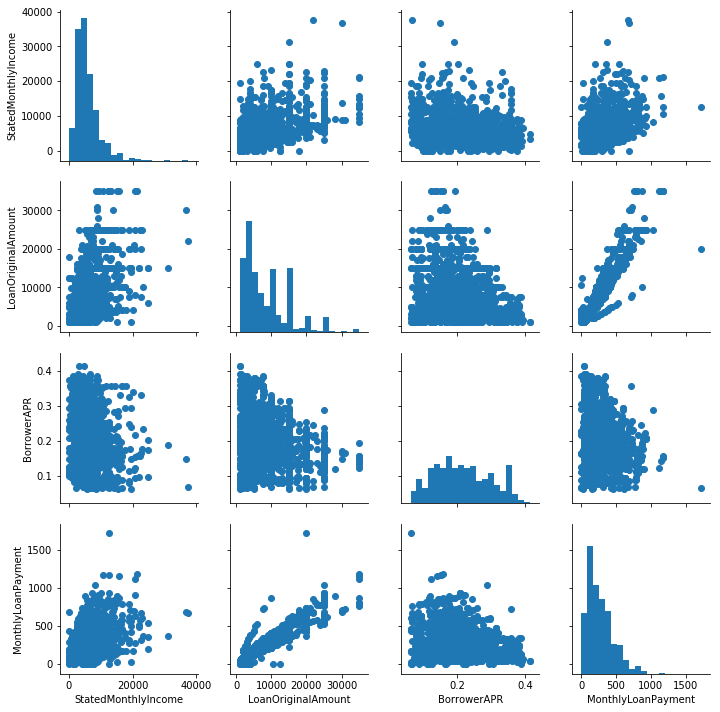

In [89]:
# plot matrix: sample 2000 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df_clean.shape[0], 2000, replace = False)
df_clean_samp = df_clean.loc[samples,:]
df_clean_samp.reindex()

g = sb.PairGrid(data = df_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

**Observation**: As corroborated by the heatmap, there is hardly any correlation between our numeric variables of interest. This may suggest that areas for better insight shall be in the relationships between quantitative and qualitative variables.

Let's move on to looking at  if there is any correlation between the numeric variables and the categorical variables.

<Figure size 720x720 with 0 Axes>

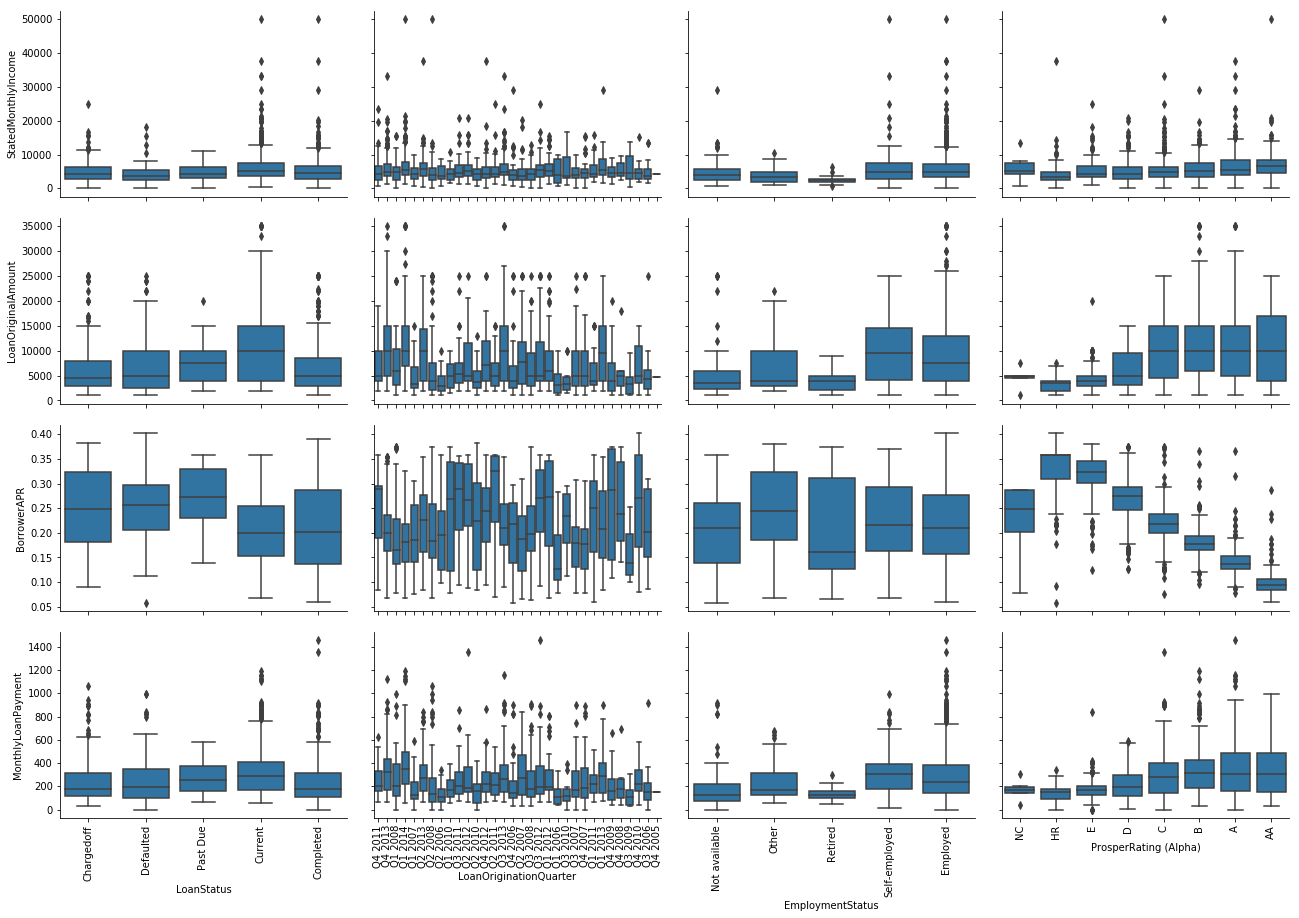

In [90]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_clean.shape[0], 2000, replace = False)
df_clean_samp = df_clean.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_clean_samp, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

(Rewrite) **Observations**: As expected, there appears to be negtive reactions between the Propser Ratings and the Borrower APR. Borrowers with higher Prosper Ratings tend to have lower APRs. There also appears ot be positive relationships between the ProsperRating and the Loan Amounts. Borrowers with a Prosper Ratings of 'C' and above tend to have access to the larger loan products with a median loan amount at about $10000.


Let's take a closer look at the box plots for Loan Origination Quarter

<Figure size 1440x360 with 0 Axes>

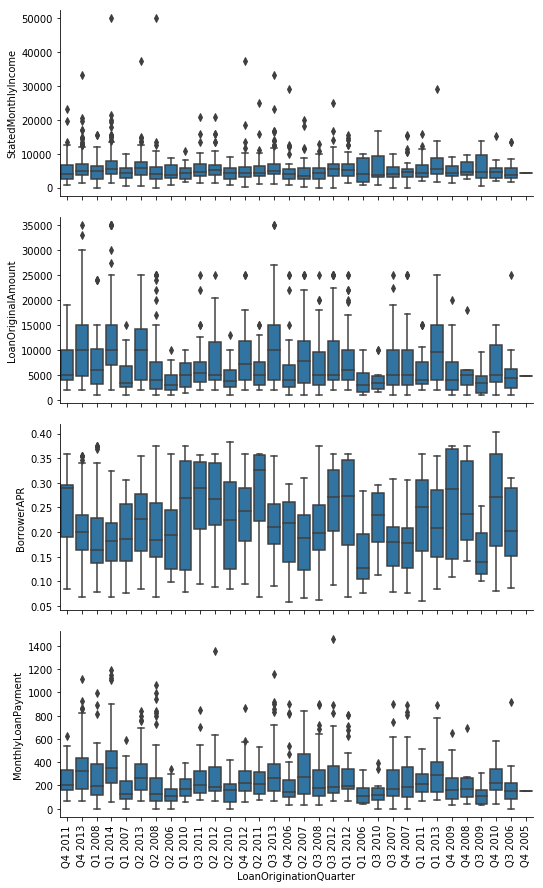

In [91]:
plt.figure(figsize = [20, 5])
g = sb.PairGrid(data = df_clean_samp, y_vars = numeric_vars, x_vars = 'LoanOriginationQuarter',
                height = 3, aspect = 2.5)
g.map(boxgrid)

plt.show();

**Observation**: The `LoanOriginalQuarter` Does not appear to show any significant trends across the numerical variables. There are some interesting observations in the latter quarters,where it appears that  Borrower APR tends to be lower, and the median loan tends to hover around $10000. We will not bother exploring this variable going further.

In [92]:
#Remove LoanOriginatorQuarter from catergorical variables array
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'ProsperRating (Alpha)']

Let's take a closer look at the relatioship between Stated Monthly income of the borrower and the Monthly Loan Payment

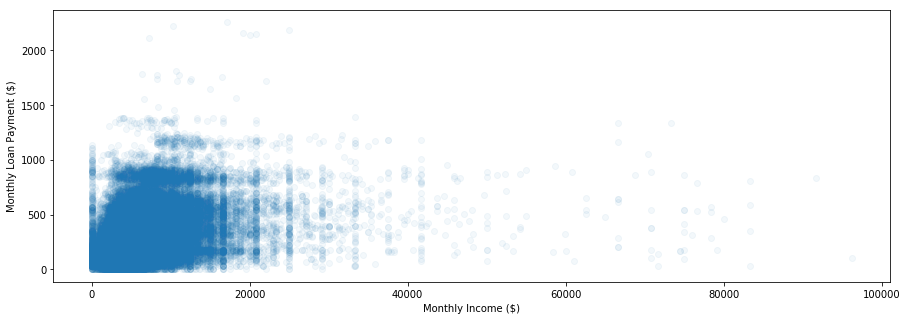

In [93]:
#plot loan amount vs monthly Payment
plt.figure(figsize = [15, 5])
sb.regplot(data = df_clean, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', fit_reg = False, x_jitter = 0.04, scatter_kws = {'alpha': 0.05});
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Payment ($)');

**Observation**: The plot does not show any correlation or obvious trends other than the fact that there is a concentration of loans under USD30000,and monthly payments under USD1100. This would warrant further investigationinthe multivariate section of my analysis.

I will create a heat map of this plot to see if anything interesting is revelaed 

Text(0, 0.5, 'Monthly Loan Payment ($)')

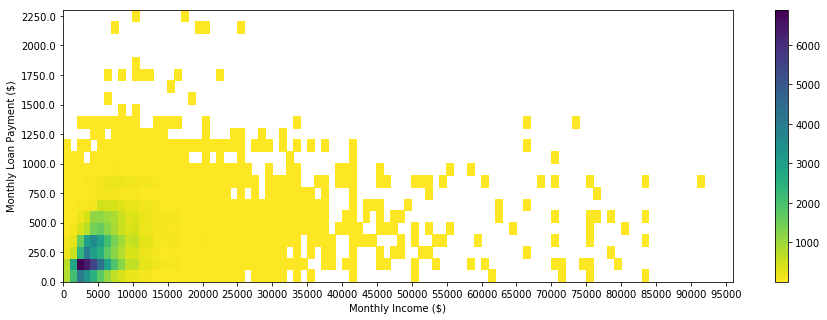

In [94]:
plt.figure(figsize = [15, 5])
bin_x = np.arange(0,df_clean.StatedMonthlyIncome.max()+100, 1000)
bin_y = np.arange(0, df_clean.MonthlyLoanPayment.max()+100, 100)
x_ticks = np.arange(0, df_clean.StatedMonthlyIncome.max()+100, 5000)
x_tick_names = ['{:0.0f}'.format(v) for v in x_ticks]
y_ticks = np.arange(0, df_clean.MonthlyLoanPayment.max()+100, 250)

plt.hist2d(data = df_clean, x = 'StatedMonthlyIncome', y ='MonthlyLoanPayment', cmin = 0.5, cmap = 'viridis_r', bins=[bin_x, bin_y]);
plt.colorbar()
plt.xticks(x_ticks, x_tick_names)
plt.yticks(y_ticks, y_ticks)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Payment ($)')

We see a major concentration of values between monthly incomes of USD1000-8,000 and monthly payments oof USD0-600. We may consider looking at this sub group to see if there is any additional insight to be revealed.


Now, let's look at relationsips between the categorical variable using clustered bar charts. For this exploratory analysis

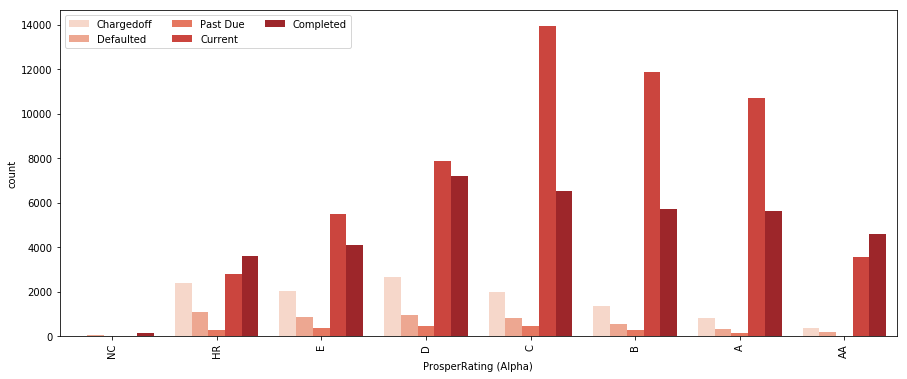

In [95]:
plt.figure(figsize = [15, 6])
sb.countplot(data = df_clean, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', palette = 'Reds')
plt.xticks(rotation =90)
plt.legend(loc = 2, ncol = 3); # re-arrange legend to reduce overlapping

**Observation**: We can deduce that borrowers assigned to the lower Propser Ratings (NC, HR, E & D) have a higher proportion of their loans performing negatively (Chargedoff, Defaulted & Past Due) than those performing positively (Current & Completed). Interestingly, borrowers assigned the propser rating 'C' proportinally have more good performing loans than all other Propser ratings, with a majority of the loans in the 'Current' status

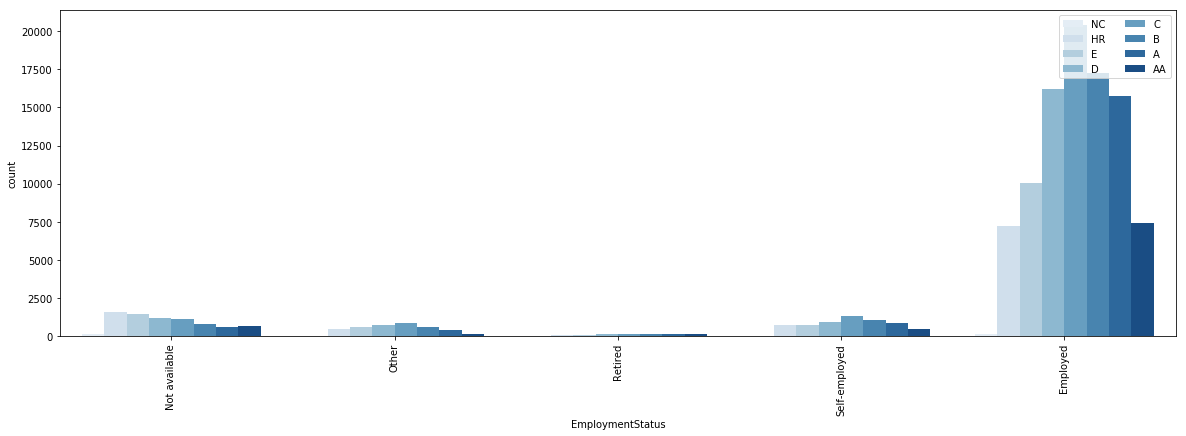

In [96]:
plt.figure(figsize = [20, 6])
sb.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.xticks(rotation =90)
plt.legend(loc = 1, ncol = 2); # re-arrange legend to reduce overlapping

**Observations**: From the plot we can see that loans are provided overwhelmingly to borrowers that have employment, regardless of their Prosper Rating. This is understandable as having employent increases a borrower's ability to pay back the loan and reduces the risk of bad performing loans.

Let's see if there is an interesing relationship between a borrower's employment and the perfromance of the loan

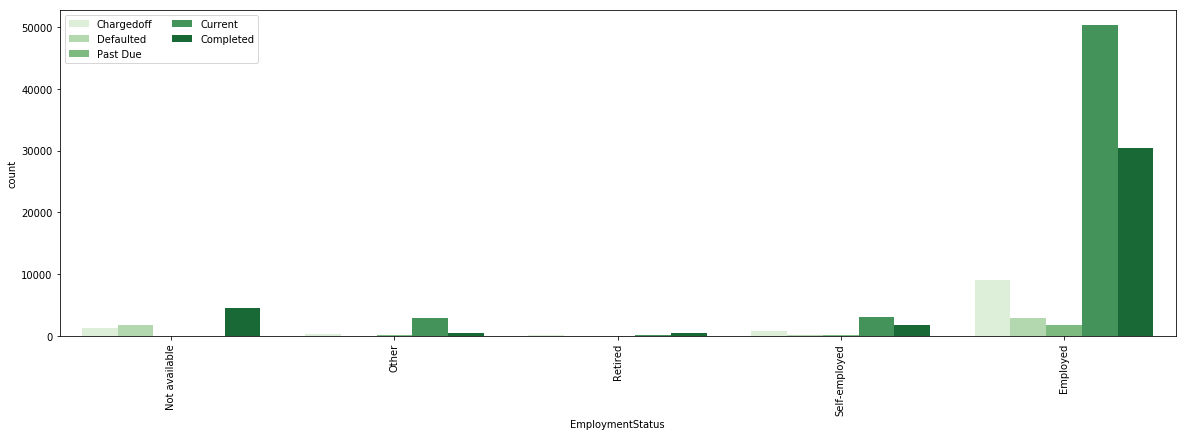

In [97]:
plt.figure(figsize = [20, 6])
sb.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Greens')
plt.xticks(rotation =90)
plt.legend(loc = 2, ncol = 2); # re-arrange legend to reduce overlapping

**Observation**: Though there are more negatively perofoming loans associated with Employed borrowers, we can see that an overwhelming nuber of the loans have positive loans statuses (Current and Completed).


Next, we take a look at bi-variate visualizations of the numeric variables on the categorical variables.

To ensure an easier read plot, I will create a transform of the `StatedMonthlyIncome` variable into a logarithmic scale

In [98]:
# compute the logarithm of montly income to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_clean['StatedMonthlyIncomeLog'] = df_clean['StatedMonthlyIncome'].apply(log_trans)

Since the log scale does not account for a zero(0) value, we have to address these values in an appropriate way

In [99]:
#identify $0 values in log (np.inf)
df_clean[df_clean['StatedMonthlyIncomeLog'] == -np.inf]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,StatedMonthlyIncomeLog
77,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157,A,36,Chargedoff,2009-04-09,0.18454,0.1700,0.1600,...,0.00,4381.62,4381.62,0.00,1.0,0,0,0.00,115,-inf
106,10C034203841683992703F1,321000,2008-04-29 08:26:00.340,C,36,Completed,2011-03-17,0.28320,0.2600,0.2500,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,53,-inf
761,3D743417918330010E59A92,306381,2008-04-08 16:19:26.823,AA,36,Completed,2010-12-15,0.10491,0.0980,0.0980,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,147,-inf
906,7FC53366128277829738FCD,30111,2006-08-09 06:46:29.320,A,36,Completed,2009-08-15,0.15713,0.1500,0.1425,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,63,-inf
937,0A963376701968804B62AB3,74226,2006-12-13 13:47:01.053,C,36,Completed,2009-07-13,0.14770,0.1299,0.1249,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,37,-inf
943,0ABC34181991286271447F8,309066,2008-04-12 17:49:28.630,C,36,Completed,2010-02-24,0.27767,0.2700,0.2600,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,116,-inf
1328,0BD434071469643681BED58,249339,2007-12-11 22:50:45.560,HR,36,Completed,2008-08-15,0.37036,0.3500,0.3400,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,14,-inf
1460,6E883422015766827EBD4FB,341477,2008-05-29 23:16:57.627,AA,36,Chargedoff,2009-04-07,0.19730,0.1900,0.1800,...,0.00,22542.68,22542.68,0.00,1.0,0,0,0.00,196,-inf
1768,03AD34205742397461E3755,323971,2008-05-02 06:11:50.500,HR,36,Chargedoff,2009-05-13,0.37453,0.3500,0.3400,...,-7.05,950.95,950.95,0.00,1.0,0,0,0.00,11,-inf
1800,7ADB3406918567171B985BA,247376,2007-12-09 07:44:48.407,E,36,Completed,2009-12-01,0.16991,0.1555,0.1455,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,5,-inf


**Note**: Given that we have incomes of $0 in our data, this will not translate on the log scale. Hence we will replace zero dollar values with a log value of -6 (or 0.000001) in decimal scale

In [100]:
#replace all infinty values with -6 (log 0.0000001)
df_clean.replace(-np.inf, -6, inplace = True)

In [101]:
#verify nan values are replaced with -6
df_clean.query('StatedMonthlyIncomeLog == -6')


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,StatedMonthlyIncomeLog
77,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157,A,36,Chargedoff,2009-04-09,0.18454,0.1700,0.1600,...,0.00,4381.62,4381.62,0.00,1.0,0,0,0.00,115,-6.0
106,10C034203841683992703F1,321000,2008-04-29 08:26:00.340,C,36,Completed,2011-03-17,0.28320,0.2600,0.2500,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,53,-6.0
761,3D743417918330010E59A92,306381,2008-04-08 16:19:26.823,AA,36,Completed,2010-12-15,0.10491,0.0980,0.0980,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,147,-6.0
906,7FC53366128277829738FCD,30111,2006-08-09 06:46:29.320,A,36,Completed,2009-08-15,0.15713,0.1500,0.1425,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,63,-6.0
937,0A963376701968804B62AB3,74226,2006-12-13 13:47:01.053,C,36,Completed,2009-07-13,0.14770,0.1299,0.1249,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,37,-6.0
943,0ABC34181991286271447F8,309066,2008-04-12 17:49:28.630,C,36,Completed,2010-02-24,0.27767,0.2700,0.2600,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,116,-6.0
1328,0BD434071469643681BED58,249339,2007-12-11 22:50:45.560,HR,36,Completed,2008-08-15,0.37036,0.3500,0.3400,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,14,-6.0
1460,6E883422015766827EBD4FB,341477,2008-05-29 23:16:57.627,AA,36,Chargedoff,2009-04-07,0.19730,0.1900,0.1800,...,0.00,22542.68,22542.68,0.00,1.0,0,0,0.00,196,-6.0
1768,03AD34205742397461E3755,323971,2008-05-02 06:11:50.500,HR,36,Chargedoff,2009-05-13,0.37453,0.3500,0.3400,...,-7.05,950.95,950.95,0.00,1.0,0,0,0.00,11,-6.0
1800,7ADB3406918567171B985BA,247376,2007-12-09 07:44:48.407,E,36,Completed,2009-12-01,0.16991,0.1555,0.1455,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,5,-6.0


**Note**: Changes to our data such as transforms may very well have modified our ordered variables. We will verify this in the steps below:

In [102]:
df_clean['ProsperRating (Alpha)'].unique()

array(['C', 'A', 'HR', 'D', 'B', 'E', 'AA', 'NC'], dtype=object)

In [103]:
df_clean['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff'],
      dtype=object)

As suspected, transform performed to the dataset has likely altered our ordered categorical types. I shall repeat ordered.. step to ensure ordinal data is kept intact.

In [104]:
# convert IncomeRange, LoanOriginationQuarter, LoanStatus, ProsperRating (Alpha) and Employment Status into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999','$25,000-49,999', 
                                    '$50,000-74,999', '$75,000-99,999','$100,000+'], 
                    'LoanStatus': ['Chargedoff', 'Defaulted', 'Past Due',  'Current', 'Completed'],
                    'ProsperRating (Alpha)': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'EmploymentStatus':['Not available', 'Other', 'Retired','Self-employed','Employed']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

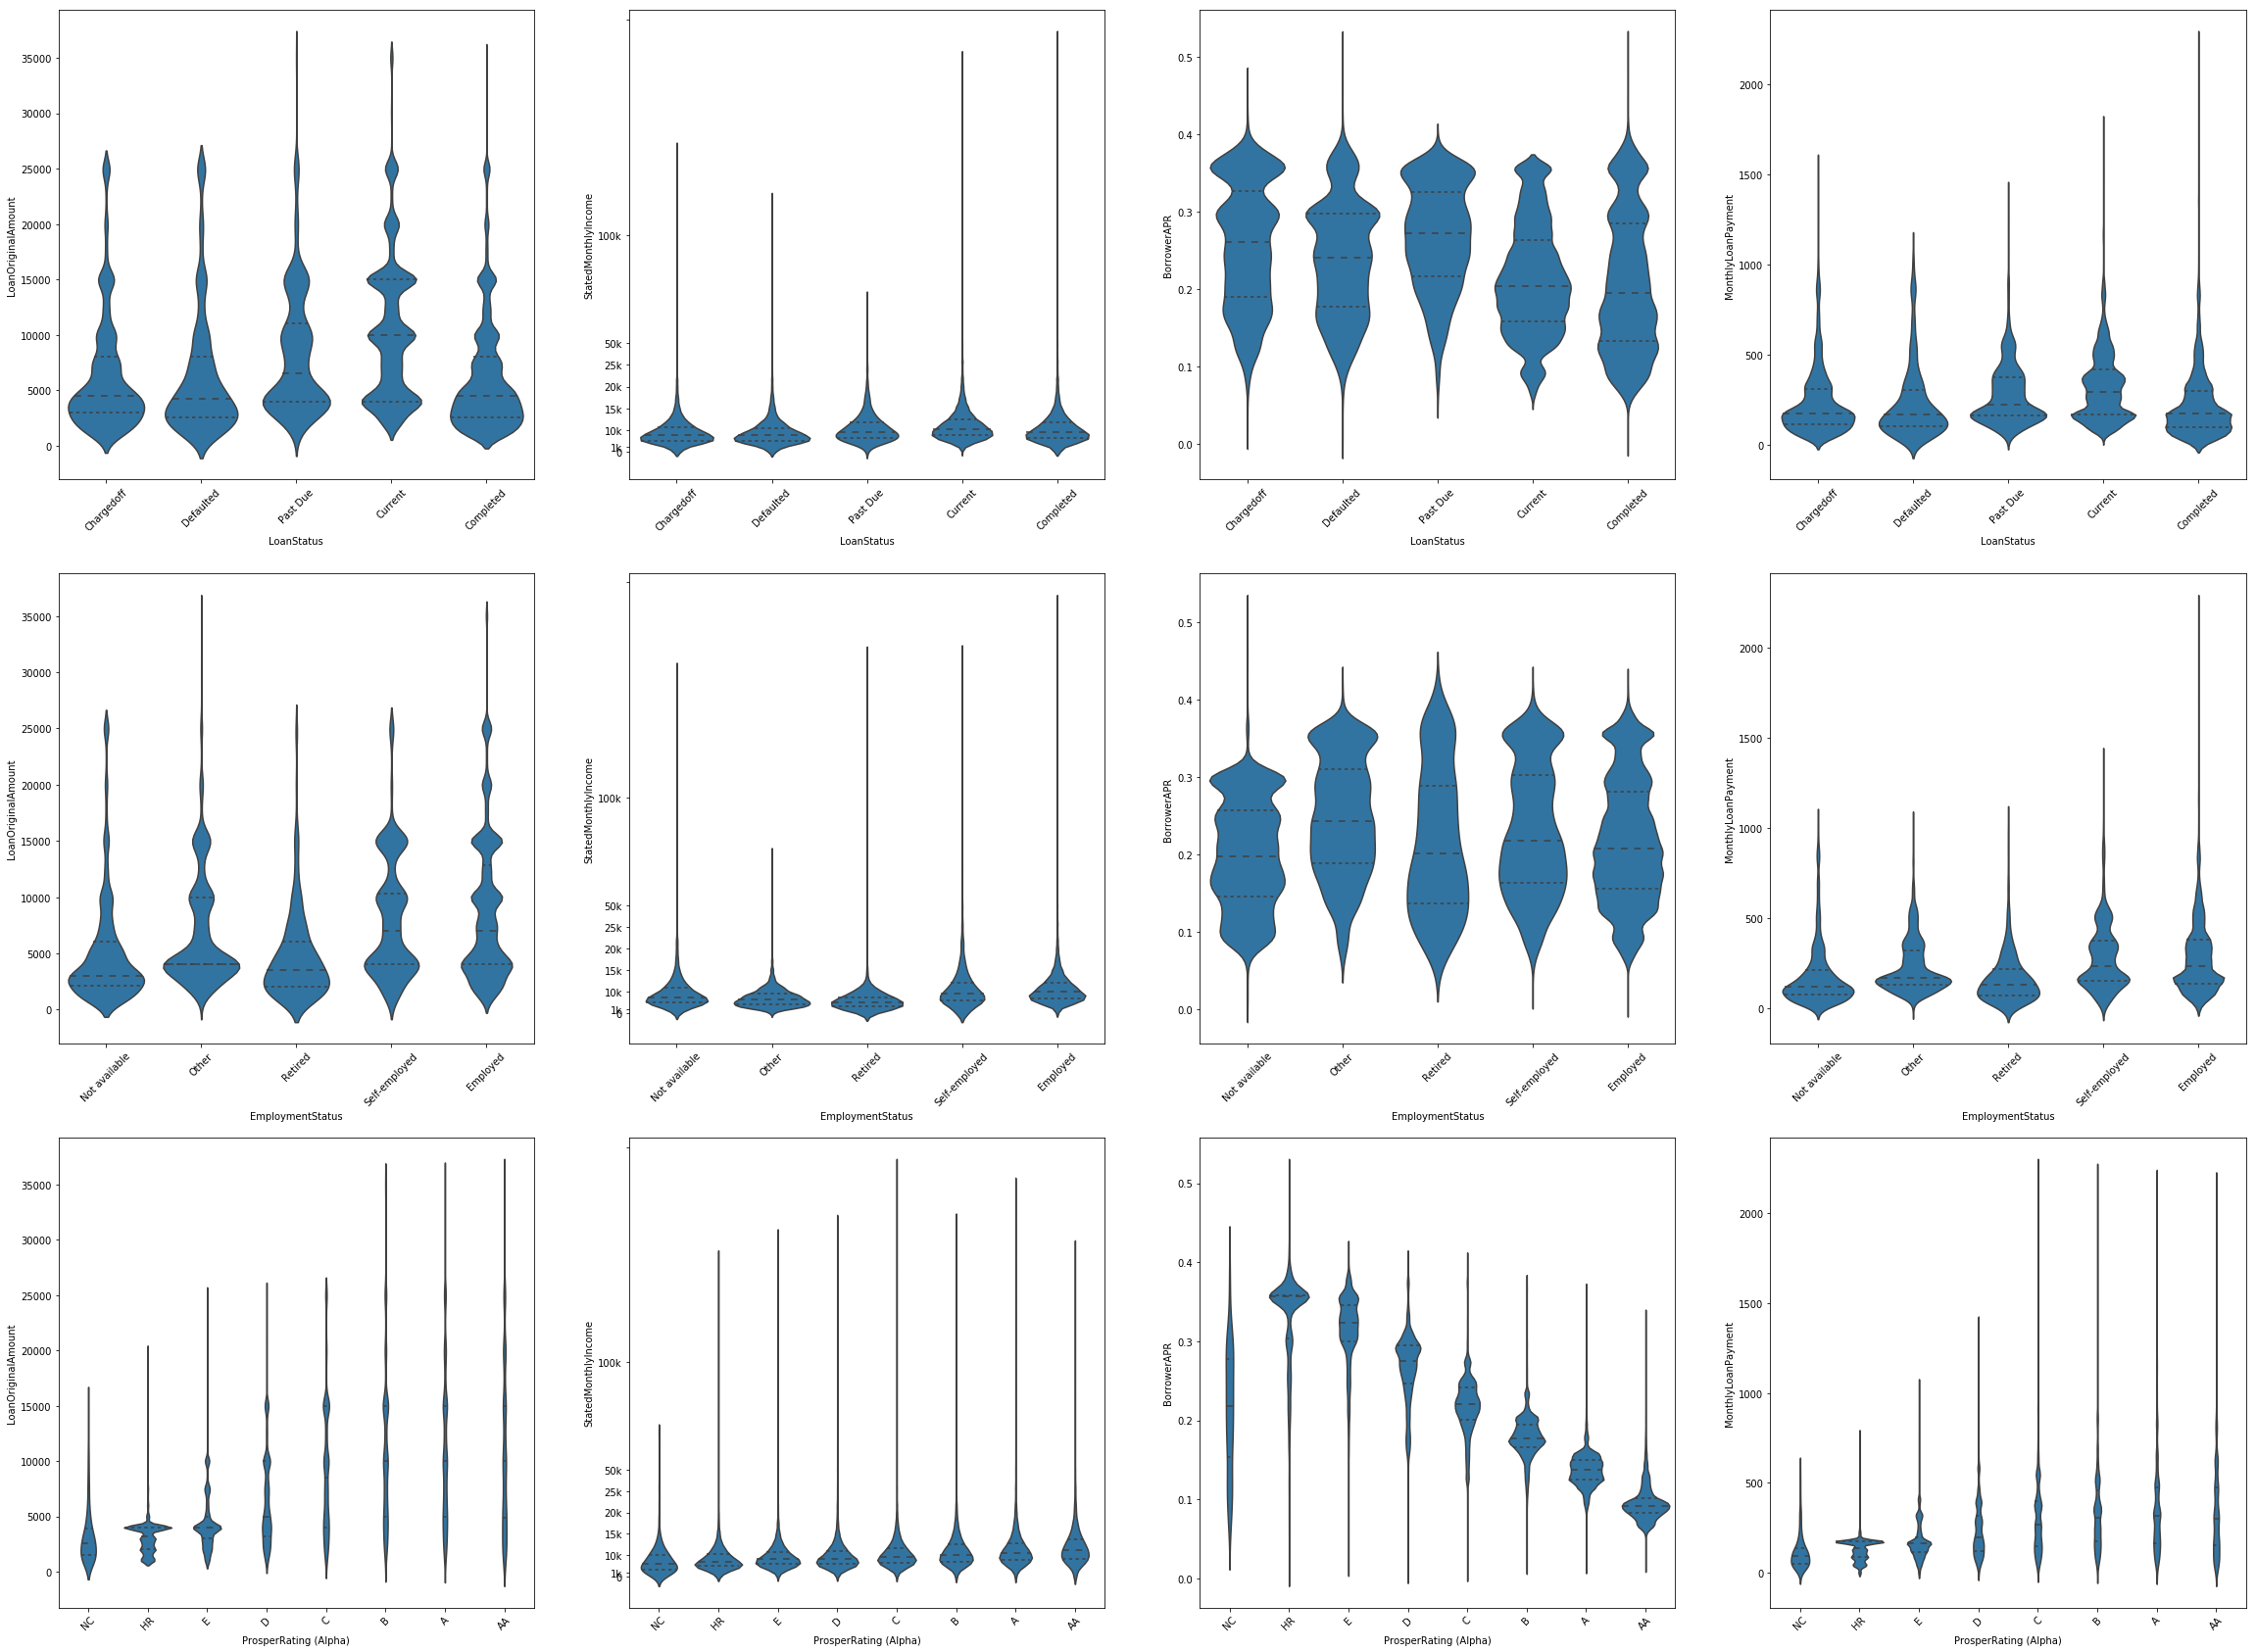

In [105]:
# plot the categorical variables against stated monthly income and loan amoint again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 4, nrows = 3 , figsize = [40,30])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    
    sb.violinplot(data = df_clean, x = var, y = 'LoanOriginalAmount', ax = ax[i,0], color = base_color, inner = 'quartile')
    xticks = ax[i,0].get_xticks()
    xticklabel = ax[i,0].get_xticklabels()
    ax[i,0].set_xticks(xticks)
    ax[i,0].set_xticklabels(xticklabel, rotation = 45)
    
    
    sb.violinplot(data = df_clean, x = var, y = 'StatedMonthlyIncome', ax = ax[i,1], color = base_color, inner = 'quartile')
    xticks = ax[i,0].get_xticks()
    xticklabel = ax[i,0].get_xticklabels()
    ax[i,1].set_xticks(xticks)
    ax[i,1].set_xticklabels(xticklabel, rotation = 45)
    ax[i,1].set_yticks([1, 1e3, 5e3, 1e4, 1.5e4, 2e4, 2.5e4, 5e4, 1e5])
    #ax[i,1].set_yticks(log_trans(np.array([1, 1e3, 1e4, 1e5, 2e5])))
    ax[i,1].set_yticklabels([0, '1k', '10k', '15k', '20k', '25k', '50k', '100k'])
    
    
    sb.violinplot(data = df_clean, x = var, y = 'BorrowerAPR', ax = ax[i,2], color = base_color, inner = 'quartile')
    ax[i,2].set_xticks(xticks)
    ax[i,2].set_xticklabels(xticklabel, rotation = 45)
   
    
    sb.violinplot(data = df_clean, x = var, y = 'MonthlyLoanPayment', ax = ax[i,3], color = base_color, inner = 'quartile')
    ax[i,3].set_xticks(xticks)
    ax[i,3].set_xticklabels(xticklabel, rotation = 45)
    
    

plt.show()

**Observation**: From the violin plots, there appears to be reveal interesting relationships between a number of numeric variables. In summary:
- the Loan Amounts, though fewer in count at the upper ranges, tend to increase as the borrower's Propsper Ratings increases. 
- the Loan Amounts tend to decrease as the Employment Status of the borrower becomes less favourable. 

We also see a high correlation, where the Borrower APR  decrease as the Prosper Ratings are higher. 

Let's take a further look at the `StatedMonthlyIncome` vs `Prosper Rating (Alpha)` , and some numeric relationships against LoanStatus enlarged

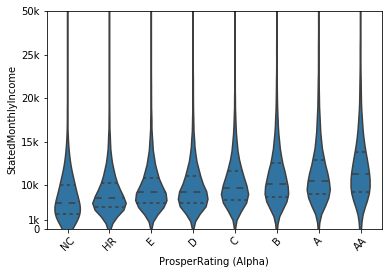

In [106]:
sb.violinplot(data = df_clean, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = base_color, inner = 'quartile')
plt.xticks(rotation = 45);
#plt.ylim([0,25000])
plt.yticks([1, 1e3, 5e3, 1e4, 1.5e4, 2e4, 2.5e4, 5e4, 1e5], [0, '1k', '10k', '15k', '20k', '25k', '50k', '100k'])
plt.ylim([0,25000]);


**Observation**: A closer look at this plot shows that higher incomes tend to receive higher ratings to receive loans. This could potentially be a bias and it would be interesting to see how well the loans perform (i.e LoanStatus)

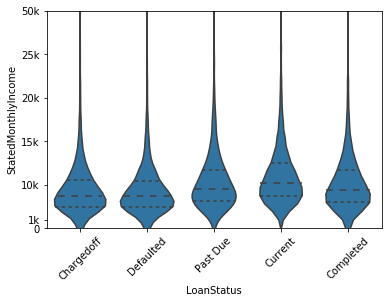

In [107]:
sb.violinplot(data = df_clean, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = base_color, inner = 'quartile')
plt.xticks(rotation = 45);
plt.yticks([1, 1e3, 5e3, 1e4, 1.5e4, 2e4, 2.5e4, 5e4, 1e5], [0, '1k', '10k', '15k', '20k', '25k', '50k', '100k'])
plt.ylim([0,25000]);

**Observation**: A closer look at the plot above does suggest there is a noticable trend in the relationship between Monthly Income and the status of the loan, whereby an increase in monthly income results in an improvement in the status of the loan. We do however notice a slight dip in the loans with a 'Complete' designation, which will be further explored

Let's explore any significant trend betweeen the MonthlyLoanPayment and the vs. LoanStatus

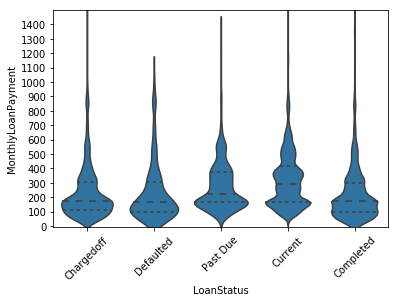

In [108]:
sb.violinplot(data = df_clean, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = base_color, inner = 'quartile')
bins = np.arange(0,1500, 100)
plt.xticks(rotation = 45);
plt.ylim([-10,1500])
plt.yticks(bins, bins);

**Observation**: A closer look at the plot below does not indicate a noticable trend in the relationship between Monthly Loan Payments and the status of the loan. This sugests there are other factors that affect this relationship.

## Takeaways

The Borrower's Monthly Income, was proven to have some positive correlation with the Prosper Rating given to them. This also eventually leads to an inverse correlation with the APR provided to the loan products. 

This  may also suggest that borrowers with increasing monthly incomes or in higherincome ranges may have access to higher loan amounts. We will explore thisfurther in the multivariate section of our exploratory analysis.

## Multivariate

Our key areas of investingation in this setion is to better understand how categorical and numeric affect the status of the loan positively or negatively.

We will start by looking at a random subset of the data for our initial analysis

In [109]:
samples = np.random.choice(df_clean.shape[0], 3000, replace = False)
df_clean_samp = df_clean.loc[samples,:]

#### StatedMonthlyIncome vs. MonthlyLoanPayment

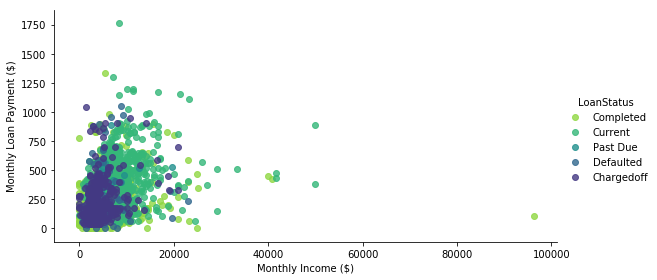

In [110]:
#plot loan amount vs monthly Payment across Loan Status
g = sb.FacetGrid(data =df_clean_samp, hue= 'LoanStatus', hue_order=['Completed','Current','Past Due','Defaulted','Chargedoff'], height = 4, aspect =2, palette='viridis_r')
g.map(sb.regplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', fit_reg = False, x_jitter = 0.04);
g.add_legend()
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Payment ($)');

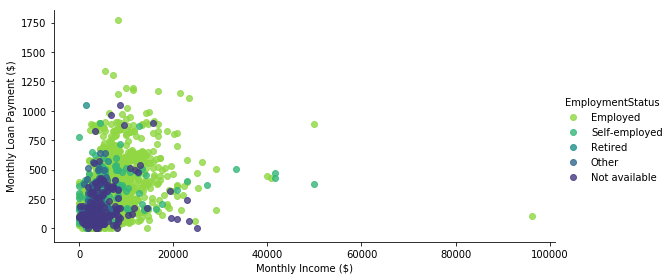

In [111]:
#plot loan amount vs monthly Payment across Employment Status
g = sb.FacetGrid(data =df_clean_samp, hue= 'EmploymentStatus', hue_order=['Employed','Self-employed','Retired','Other','Not available'] , height = 4, aspect =2, palette='viridis_r')
g.map(sb.regplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', fit_reg = False, x_jitter = 0.04);
g.add_legend()
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Payment ($)');

<Figure size 1440x720 with 0 Axes>

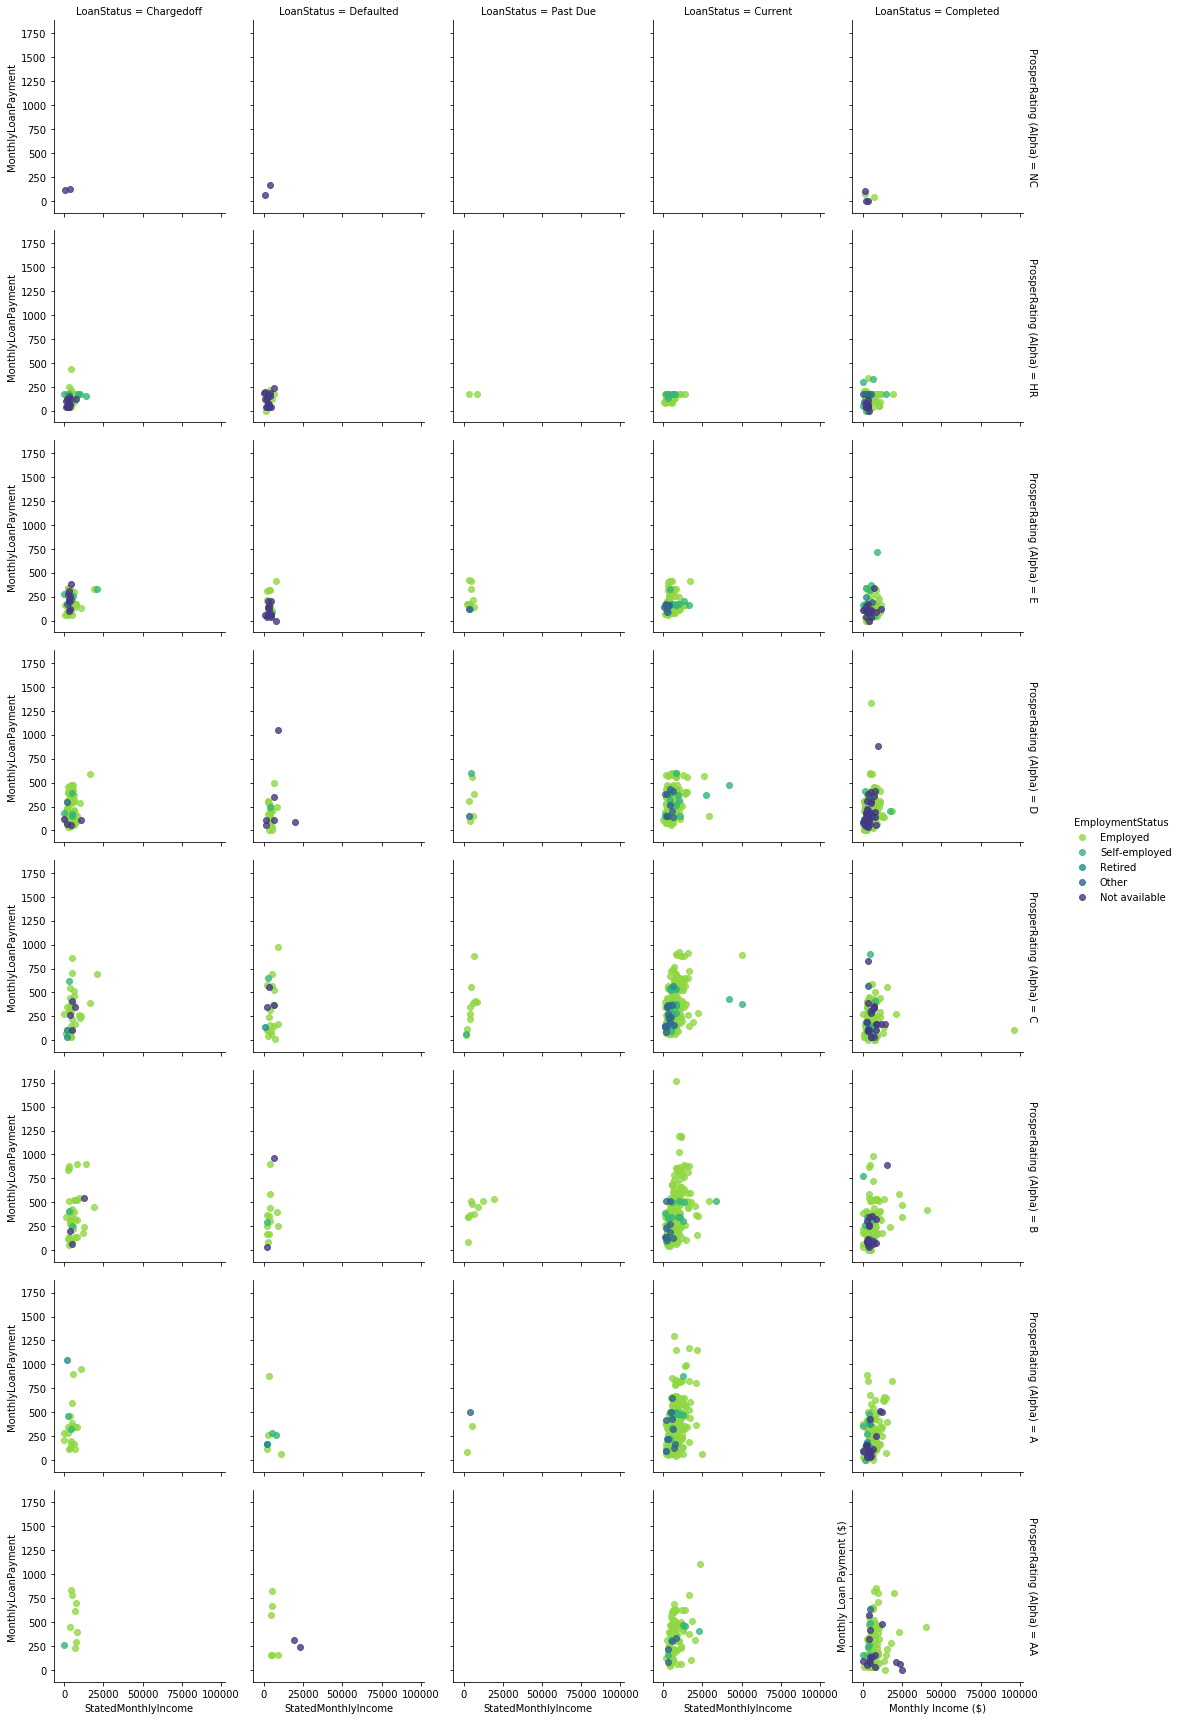

In [112]:
#plot monthly income vs monthly Payment across Loan status and employment status
plt.figure(figsize = [20,10])
g = sb.FacetGrid(data =df_clean_samp, col = 'LoanStatus', row = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', hue_order=['Employed','Self-employed','Retired','Other','Not available'],
                 palette='viridis_r', margin_titles = True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', fit_reg = False, x_jitter = 0.04);
g.add_legend()
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Payment ($)');

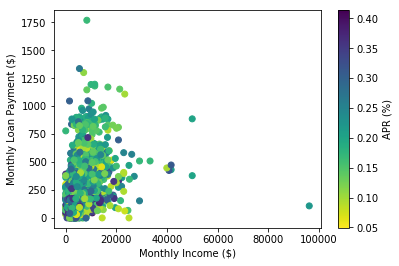

In [113]:
#plot loan amount vs monthly Payment across Borrower APR
plt.scatter(data = df_clean_samp, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', c = 'BorrowerAPR', cmap = 'viridis_r')
plt.colorbar(label = 'APR (%)')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Payment ($)');

**Observation**: Even with a smaller sample size, the multivariate exploration of the Monthly Loan  Payment against the borrower's monthly income does not provide much insight as there are a lotof facets to look at. Let's try and look at a certain APR range to see if we can get a better summary

Let's take a look at a subset of the data dealing with the interest rate withthe most loans (36 %)

In [114]:
apr_2_pct = df_clean[(df_clean['BorrowerAPR'] >= 0.35) & (df_clean['BorrowerAPR'] < 0.37)]
apr_2_pct.shape

(7784, 82)

<Figure size 1440x720 with 0 Axes>

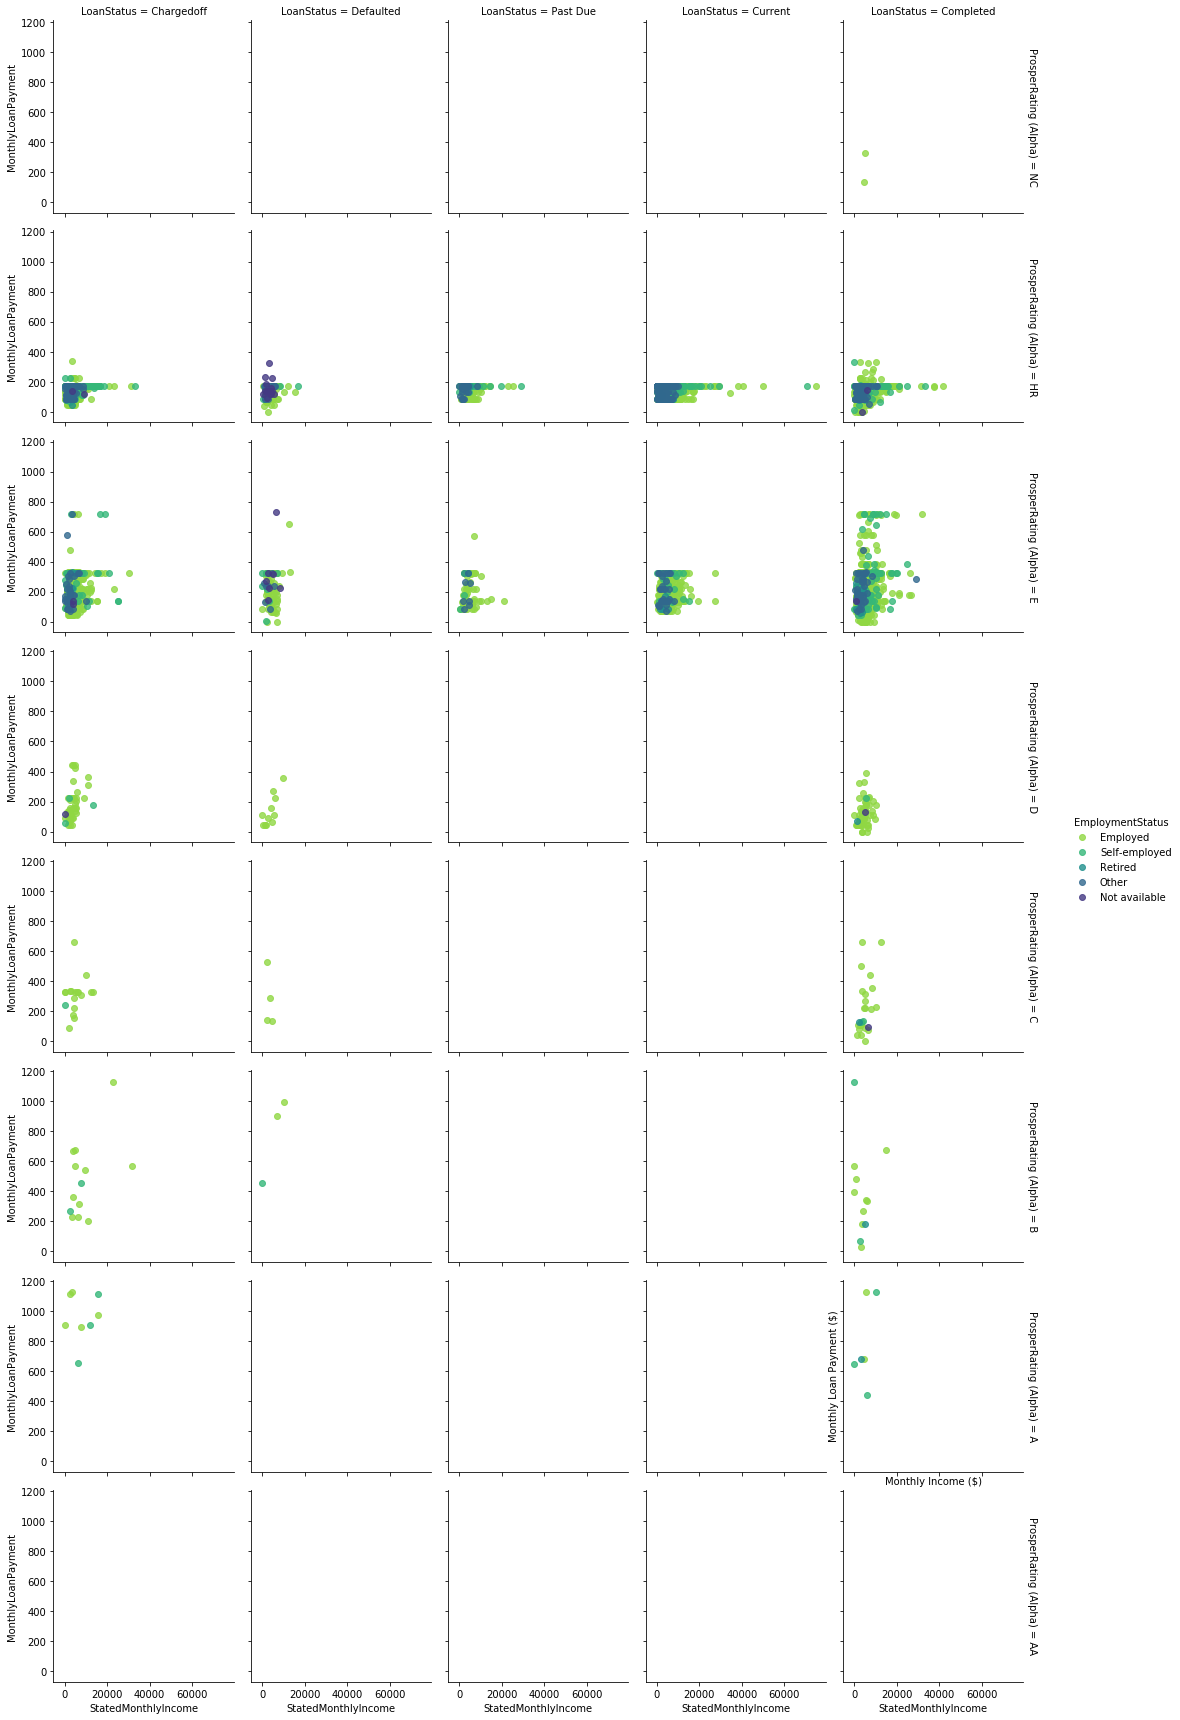

In [115]:
#plot monthly income vs monthly Payment across Loan status and employment status (36%APR)
plt.figure(figsize = [20,10])
g = sb.FacetGrid(data = apr_2_pct, col = 'LoanStatus', row = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', hue_order=['Employed','Self-employed','Retired','Other','Not available'],
                 palette='viridis_r', margin_titles = True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', fit_reg = False, x_jitter = 0.04);
g.add_legend()
plt.xlabel('Monthly Income ($)')
plt.ylabel('Monthly Loan Payment ($)');

**Observation**: Faceting of the Monthly Loan  ufortunately does not offer that much insight into the data

Next, we investigate the relationship between the Borrower's Stated MOnthly Income and The Propsper Rating as they relate to the Loan Status

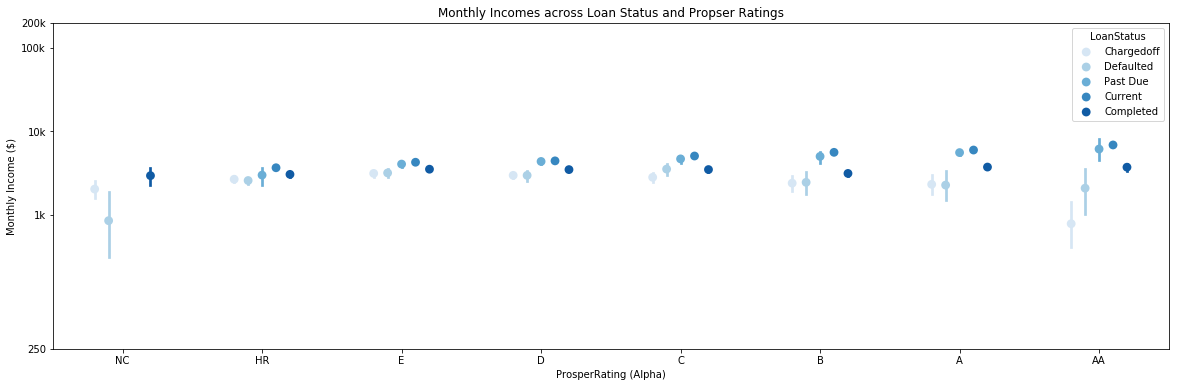

In [116]:
#Pointplot of Monthly Income across Loan Status and Prosper Rating

fig = plt.figure(figsize = [20,6])
ax = sb.pointplot(data = df_clean, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncomeLog', hue = 'LoanStatus', 
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Monthly Incomes across Loan Status and Propser Ratings')
plt.ylabel('Monthly Income ($)')
#plt.yscale('log')
plt.yticks(log_trans(np.array([25, 1e3, 1e4, 1e5, 2e5])), [250, '1k', '10k', '100k', '200k']);
ax.set_yticklabels([],minor = True)
plt.show();

**Observation**: From the results of this plot, there seems to be a consistent distribution in the status of loans irrespective of the ratings provided when the loans were origininally given, the loans assigned to borrwoers with better Prosper Ratings tend to diverge a bit bt is likely due to fewer data points for the category..


Now let's look at loan amounts across Loan Status and Prosper Ratings

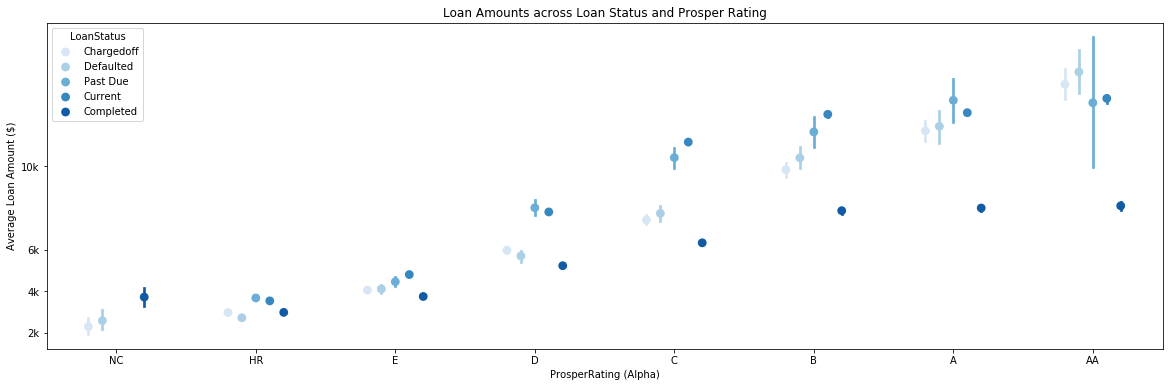

In [117]:
#pointplot of Loan Amounts across Loan Status and Prosper Rating
fig = plt.figure(figsize = [20,6])
ax = sb.pointplot(data = df_clean, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amounts across Loan Status and Prosper Rating')
plt.ylabel('Average Loan Amount ($)')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

**Observation**: As a general observation, we see a rise in the loan amount as the Prosper Rating of the borrower increases as previously predicted. Within each Proper Rating level however, we do not see any clear (rising or falling) trends across the loan status grades (Chargedoff is lowest, Completed is highest). It is significant however that borrower's with better ProsperRatings (A & AA) seem to have worse loan performances at higher loan amounts, whereas this observation was not consistent in other Prosper Rating ctategories.


Now let's look at Borrower APR across Loan Status and Prosper Ratings

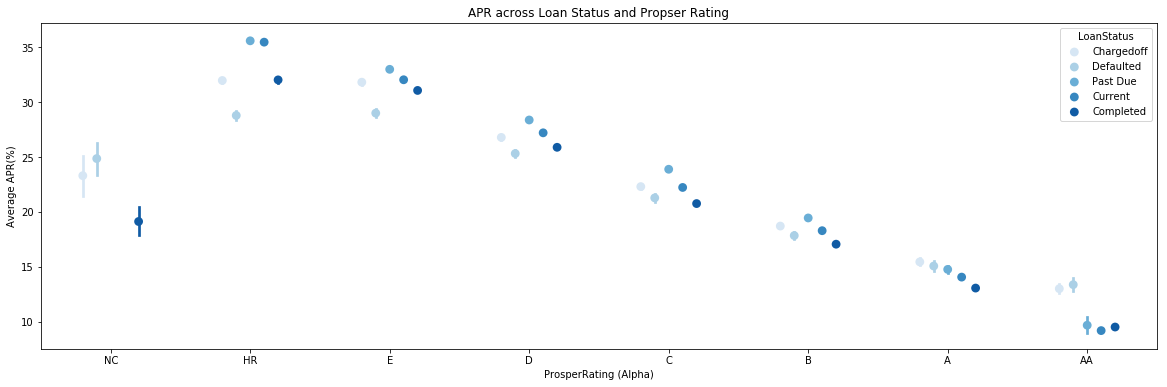

In [118]:
#Pointplot of Borrower APR across Loan Status and Prosper Rating
fig = plt.figure(figsize = [20,6])
ax = sb.pointplot(data = df_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'LoanStatus', 
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('APR across Loan Status and Propser Rating')
plt.ylabel('Average APR(%)')
plt.yticks([0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['10', '15', '20', '25', '30', '35'])
ax.set_yticklabels([],minor = True)
plt.show();

**Observation**: It can also be genrally observerd that borrowers interest rates improve (reduces) with an improving Prosper rating. Within each Prosper Ratinig level, we do see a bit of a trend that may suggest that borrowers, particularly those with positive loan performance (Completed & Current) tend to do so at the lowest levels of intrest rates made available to them irrespective of the loan size. 

For a more focussed look, let's at the mulitvariate plot accross the most common income range ('$25,000-49,999') and compare to the entire data set

In [119]:
#create subset of Income Range $25k-$50k
inc_25k_50k = df_clean[df_clean['IncomeRange'] == '$25,000-49,999']
inc_25k_50k.shape

(32138, 82)

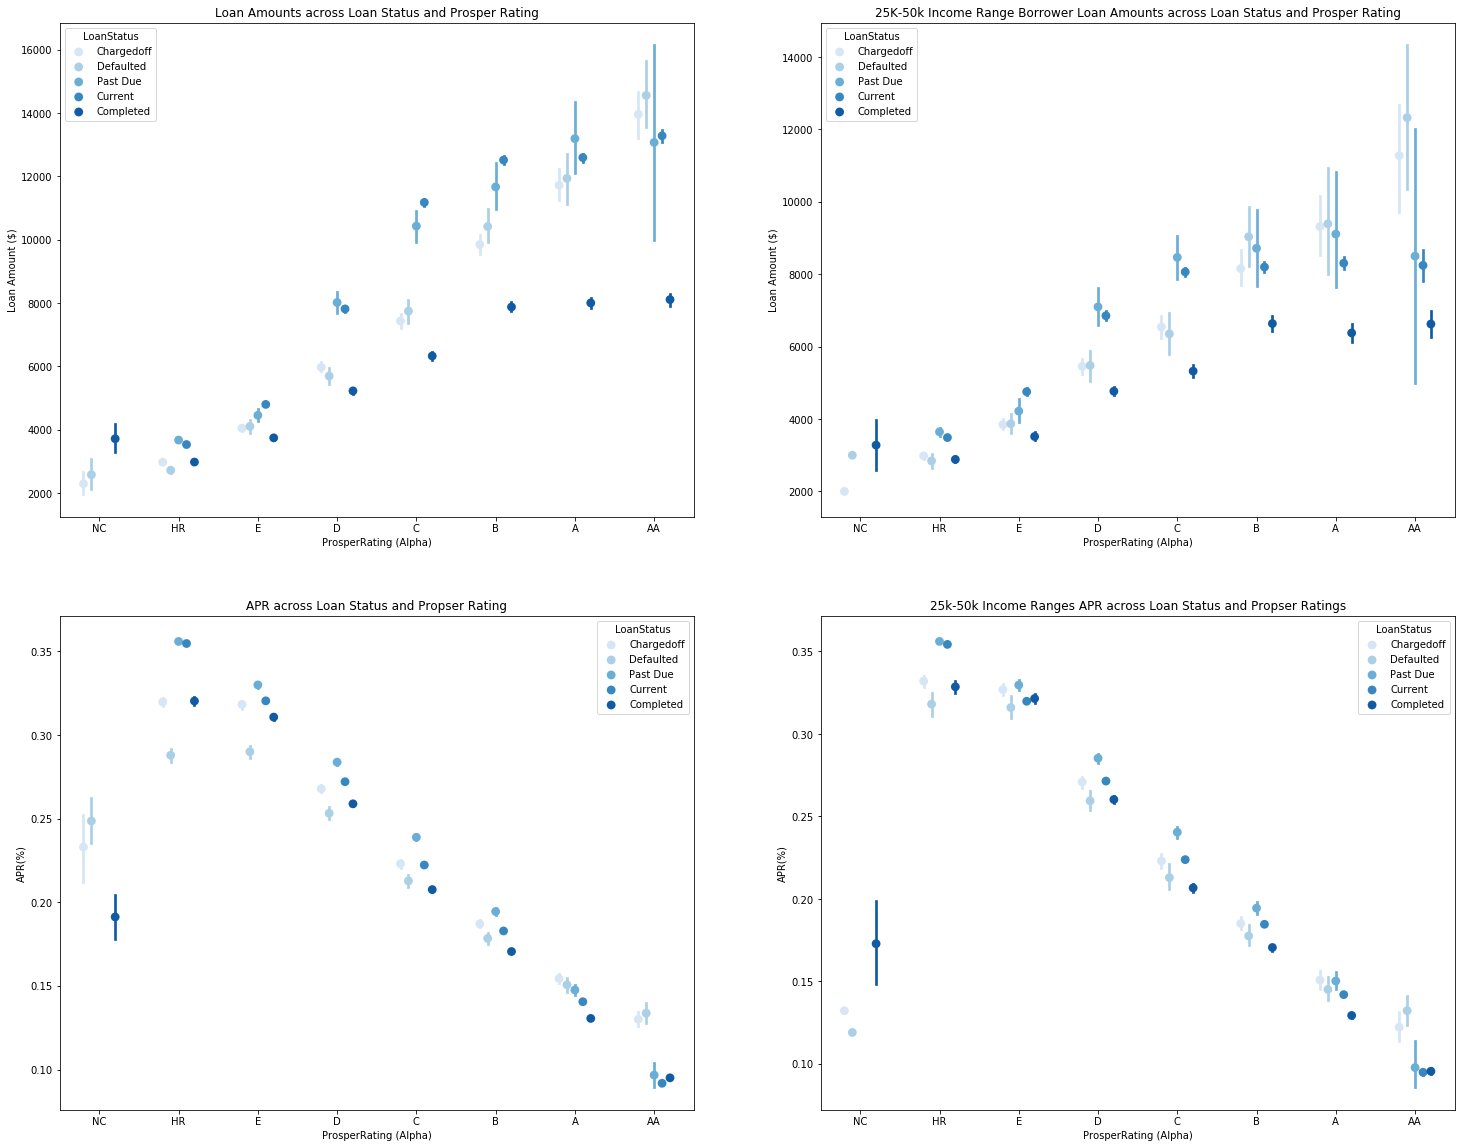

In [120]:
#Pointplots of Loan Amounts and Borrower APR across Loan Status and Prosper Rating
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [25,20])


sb.pointplot(data = df_clean, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0,0])
ax[0,0].set_title('Loan Amounts across Loan Status and Prosper Rating')
ax[0,0].set_ylabel('Loan Amount ($)')
ax[0,0].set_yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax[0,0].set_yticklabels([],minor = True)


#
sb.pointplot(data = inc_25k_50k, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0,1])
ax[0,1].set_title('25K-50k Income Range Borrower Loan Amounts across Loan Status and Prosper Rating')
ax[0,1].set_ylabel('Loan Amount ($)')
ax[0,1].set_yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax[0,1].set_yticklabels([],minor = True)

#
sb.pointplot(data = df_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'LoanStatus', 
                  palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1,0])
ax[1,0].set_title('APR across Loan Status and Propser Rating')
ax[1,0].set_ylabel('APR(%)')
ax[1,0].set_yticks([0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['10', '15', '20', '25', '30', '35'])
ax[1,0].set_yticklabels([],minor = True)



#
sb.pointplot(data = inc_25k_50k, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'LoanStatus', 
                  palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1,1])
ax[1,1].set_title('25k-50k Income Ranges APR across Loan Status and Propser Ratings')
ax[1,1].set_ylabel('APR(%)')
ax[1,1].set_yticks([0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['10', '15', '20', '25', '30', '35'])
ax[1,1].set_yticklabels([],minor = True)
plt.show();


**Observation**: Comparing the data with the subset data further corroborates our findings as the plots mirror each other.

Now, let's look at loan amounts across Loan Status and Employment Status

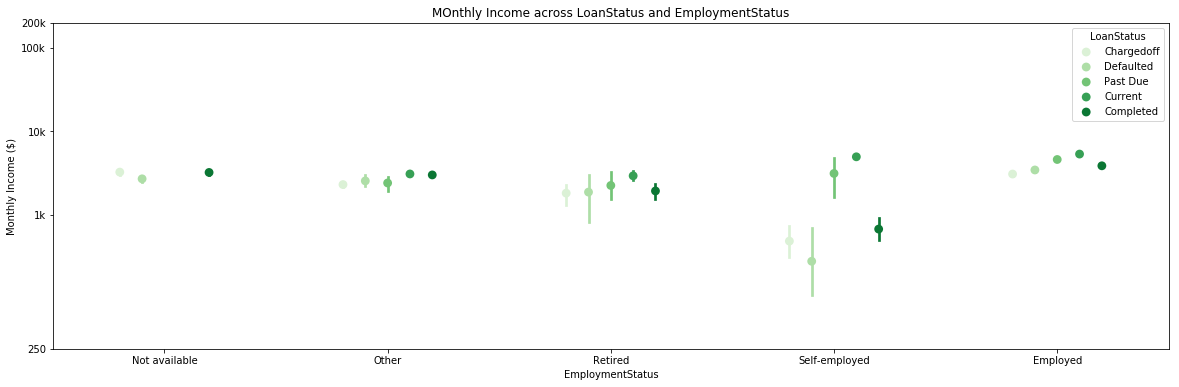

In [121]:
#Pointplot of Monthly Income across Loan Status and Employment Status

fig = plt.figure(figsize = [20,6])
ax = sb.pointplot(data = df_clean, x = 'EmploymentStatus', y = 'StatedMonthlyIncomeLog', hue = 'LoanStatus', 
                  palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('MOnthly Income across LoanStatus and EmploymentStatus')
plt.ylabel('Monthly Income ($)')
#plt.yscale('log')
plt.yticks(log_trans(np.array([25, 1e3, 1e4, 1e5, 2e5])), [250, '1k', '10k', '100k', '200k']);
ax.set_yticklabels([],minor = True)
plt.show();

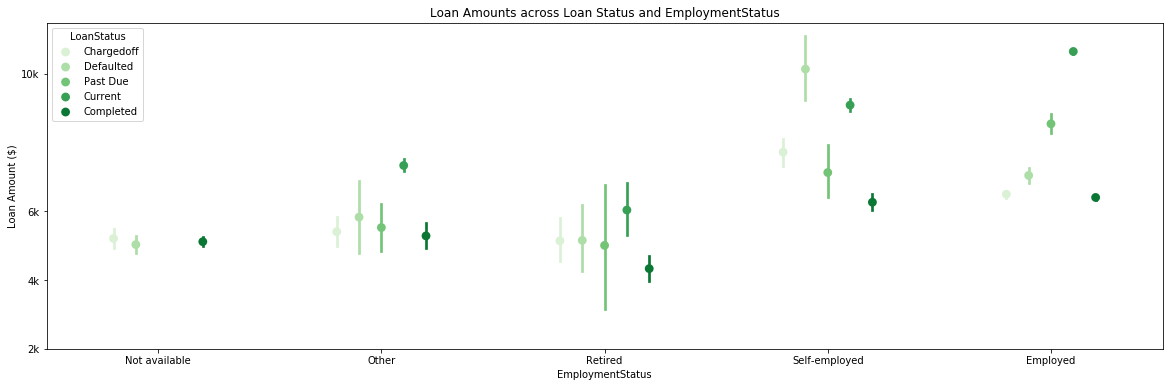

In [122]:
#pointplot of Loan Amounts across Loan Status and Employment Status
fig = plt.figure(figsize = [20,6])
ax = sb.pointplot(data = df_clean, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Amounts across Loan Status and EmploymentStatus')
plt.ylabel('Loan Amount ($)')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

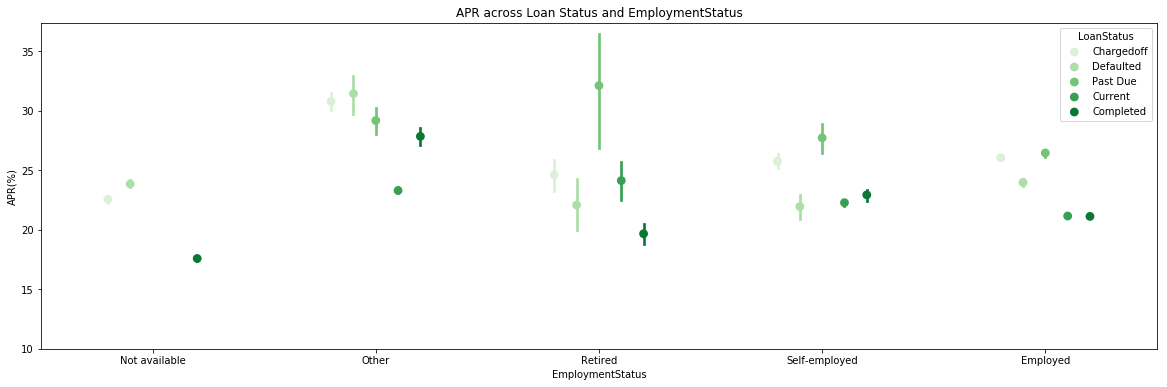

In [123]:
#Pointplot of Borrower APR across Loan Status and EmploymentStatus
fig = plt.figure(figsize = [20,6])
ax = sb.pointplot(data = df_clean, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'LoanStatus', 
                  palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('APR across Loan Status and EmploymentStatus')
plt.ylabel('APR(%)')
plt.yticks([0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['10', '15', '20', '25', '30', '35'])
ax.set_yticklabels([],minor = True)
plt.show();

**Observation** - From the point plots generated, there does not seem to be any significant trends observered, which may suggest that the Employment Status's influence of the performnce of the Loan is inconclusive.

## Summary of Findings
#### ProperRating trends
- The Prosper ratings assigned to a borrower tends to improve with an increase in the borrower's monthly income
- The Loan APR offered to a borrower tends to decrease with improvements in the borrower's Prosper Rating
- The Loan Amounts offered to borrowers also tend to increase with improvements in the borrower's Prosper Rating
- Borrowers with better Prosper Ratings tend to have their loan perform poorly at the upper limits of the loan amounts compared to borrowers with below average Prosper Rating
- Borrowers that were employed had an overwhelming advantage in receiving loans however, there was not evidence that the employment status of the borrower impacted the performnce of the loan
